In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
N_up = 1
nb_dir = '/'.join(os.getcwd().split('/')[:-N_up])
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

                                                            
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 

from src.plots import errorfill

## Some notes on plotting



## setup enviroment

In [2]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt

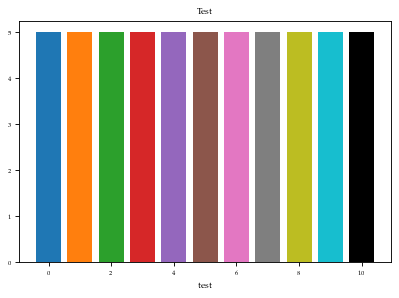

In [3]:
text_width = 5.50107 # in  --> Confirmed with template explanation
# column_width = 3.25063 # in --> Confirmed with template explanation

golden_ratio = (5**.5 - 1) / 2

import matplotlib
# matplotlib.use('pgf')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.lines as mlines

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 8  #  figure titles

matplotlib.rc('font', serif='Times')
    
matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
]  
matplotlib.rc('text', usetex=True)


matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

base_c10 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

base_c11k = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
            '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#000000']



i = range(len(base_c11k))
a = [5]*len(base_c11k)


plt.figure(dpi=80)
plt.bar(i,a, color=base_c11k)
plt.title('Test')
plt.xlabel('test')
plt.show()


# Regression Plots

# Load regression results

In [4]:
import pandas as pd

In [24]:
reg_df = pd.read_csv("regression/regression_results.csv")

In [25]:
reg_df

,method,epochs,dataset,split,n_samples,valprop,network,num,ll,err,ece,tail_ece,batch_time,width,batch_size
0,Dropout,421,protein_gap,5,5,0.15,ResNet,0,-3.470251,5.449828,0.060953,0.127852,0.014675,100,128
1,Dropout,421,protein_gap,5,10,0.15,ResNet,0,-3.438648,5.429946,0.059173,0.124339,0.030245,100,128
2,Dropout,421,protein_gap,5,20,0.15,ResNet,0,-3.423181,5.421702,0.059844,0.125604,0.057574,100,128
3,Dropout,421,protein_gap,5,30,0.15,ResNet,0,-3.418066,5.416165,0.059046,0.124308,0.086771,100,128
4,Dropout,496,protein_gap,5,5,0.15,ResNet,0,-3.497572,5.372895,0.058161,0.123735,0.015260,100,128
5,Dropout,496,protein_gap,5,10,0.15,ResNet,0,-3.457392,5.361881,0.057226,0.121997,0.028274,100,128
6,Dropout,496,protein_gap,5,20,0.15,ResNet,0,-3.440811,5.342946,0.057363,0.121668,0.059104,100,128
7,Dropout,496,protein_gap,5,30,0.15,ResNet,0,-3.430036,5.334175,0.057679,0.121399,0.090270,100,128
8,Dropout,992,protein_gap,5,5,0.15,ResNet,0,-4.079375,5.751290,0.077466,0.165348,0.017105,100,128
9,Dropout,992,protein_gap,5,10,0.15,ResNet,0,-3.977061,5.709428,0.075845,0.161252,0.033609,100,128


In [26]:
def q25(x):
            return x.quantile(0.25)

def q75(x):
            return x.quantile(0.75)
    
def q50(x):
            return x.quantile(0.5)

def make_uci_results_table(df, gap=False, nth=0, valprop=0.15, network="ResNet", n_ensembles=5,
                           n_samples=10, width=100, batch_size=128):
    df = df.copy()
    df = df[~(df.dataset.str.contains("gap"))] if gap == False else df[df.dataset.str.contains("gap")]
    df = df[df.valprop == valprop]
    df = df[df.width == width]
    df = df[df.batch_size == batch_size]
    df = df[~(~(df.network == network) & ((df.method == "DUN_none") | (df.method == "DUN_prior") | (df.method == "DUN_wd")))]
    df = df[~((df.method == "ensemble") & ~(df.n_samples == n_ensembles))]
    df = df[~((df.method == "Dropout") & ~(df.n_samples == n_samples))]
    df = df[~((df.method == "MFVI") & ~(df.n_samples == n_samples))]
        
    if gap:
        df.dataset = df.dataset.str.split("_", expand=True).iloc[:,0]
    
    df.method[df.method == "DUN_none"] = "DUN (none)"
    df.method[df.method == "DUN_prior"] = "DUN (prior)"
    df.method[df.method == "DUN_wd"] = "DUN"
    df.method[df.method == "ensemble"] = "Ensemble"
    
    df = df.sort_values("method")
    
    df = df.rename(columns={"dataset": "Dataset", "method": "Method"})
    df = (df
          .groupby(["Method", "Dataset", "n_samples", "split", "num"])
          .nth(nth)
          .groupby(["Method", "Dataset", "n_samples", "split"])
          .mean()
          .rename(columns={"ll": "LL", "err": "RMSE", "ece": "RCE", "tail_ece": "TCE", "batch_time": "batch time"})
          .groupby(["Method", "Dataset"])
          .agg({"LL": ["mean", "std", q50, q25, q75], "RMSE": ["mean", "std", q50, q25, q75],
                "RCE": ["mean", "std", q50, q25, q75], "TCE": ["mean", "std", q50, q25, q75],
                "batch time": ["mean", "std", q50, q25, q75]})
    )
    
    df.columns = ['_'.join(t).rstrip('_') for t in df.columns.values]
  
    return df

def make_uci_plots(df, formatting, gap=False, nth=0, valprop=0.15, network="ResNet",
                   n_ensembles=5, n_samples=10, use_tail=False, appendix=False):
    plot_df = make_uci_results_table(reg_df, gap, nth, valprop, network, n_ensembles, n_samples).reset_index().copy()
    
    calib_metric = ["RCE"] if not use_tail else ["TCE"]
    num_rows = 4
    if appendix:
        calib_metric = ["RCE", "TCE"]
        num_rows = 5
    
    
    dpi = 400
    scale = 1
    fill = 0.63
    fig, ax = plt.subplots(nrows=num_rows, ncols=19, dpi=dpi, constrained_layout=False, sharex='all',
                           figsize=(scale*text_width, scale*text_width*golden_ratio*1.15 * num_rows / 4), # /1.3
                           gridspec_kw={"width_ratios": [1, fill*2.5, 1, fill, 1, fill, 1, fill, 1, fill,
                                                         1, fill, 1, fill, 1, fill, 1, fill, 1]}) 
    for i in range(1,19,2):
        for j in range(num_rows):
            ax[j, i].set_axis_off()
    
    datasets = list(plot_df.Dataset.drop_duplicates())
    for i, dataset in enumerate(datasets):
        for j, metric in enumerate(['LL', "RMSE"] + calib_metric + ["batch time"]):
            tmp_df = plot_df[plot_df.Dataset == dataset].copy()

            methods = tmp_df.Method
            medians = tmp_df[metric + "_q50"]
            uppers = tmp_df[metric + "_q75"]
            lowers = tmp_df[metric + "_q25"]
            means = tmp_df[metric + "_mean"]
            stds = tmp_df[metric + "_std"]            

            for method, median, upper, lower in zip(methods, medians, uppers, lowers):
                if method == "DUN (prior)":
                    continue
                if method == "DUN (none)":
                    continue
                    
                ax[j, i * 2 + 2].errorbar([method], [median], [[median - lower], [upper - median]],
                                  c=formatting[method]["color"], lw=0.66)
                ax[j, i * 2 + 2].scatter(method, median, c=formatting[method]["color"],
                                 marker=formatting[method]["marker"], s=3, lw=0.66)
                
            if i == 0:
                ax[j, i * 2 + 2].set_ylabel(metric, fontsize=fs-1, labelpad=0.05)
            if j == 0:    
                ax[j, i * 2 + 2].set_title(dataset, fontsize=fs-1)
            ax[j, i * 2 + 2].tick_params(bottom=False, labelbottom=False)
            ax[j, i * 2 + 2].tick_params(axis='y', which='both', labelsize=fs_m1-2, pad=1.5, length=2.5)
            ax[j, i * 2 + 2].margins(x=0.15)  
            [i.set_edgecolor('#1f1f1f')  for i in ax[j, i * 2 + 2].spines.values()]
            [i.set_linewidth(0.6)  for i in ax[j, i * 2 + 2].spines.values()]
            ax[j, i * 2 + 2].tick_params(width=0.6, color='#2f2f2f')
            
            
    for j, metric in enumerate(['LL', "RMSE"] + calib_metric + ["batch time"]):
        tmp_df = plot_df.copy()
        tmp_df = tmp_df[(tmp_df.Method != 'DUN (prior)') & (tmp_df.Method != 'DUN (none)')]
        tmp_df["rank"] = tmp_df.groupby(["Dataset"])[metric + "_mean"].rank(ascending=(metric != "LL"), method="min")
        tmp_df = tmp_df.groupby(["Method"]).agg({"rank": ["mean", "std", q50, q25, q75]}).reset_index()
        tmp_df.columns = ['_'.join(t).rstrip('_') for t in tmp_df.columns.values]
                
        methods = tmp_df['Method']
        means = tmp_df['rank_mean']
        stds = tmp_df['rank_std']
        medians = tmp_df["rank_q50"]
        uppers = tmp_df["rank_q75"]
        lowers = tmp_df["rank_q25"]
        
        for method, mean, std, median, upper, lower in zip(methods, means, stds, medians, uppers, lowers):
            ax[j, 0].errorbar([method], [mean], [std],
                                      c=formatting[method]["color"], lw=0.6)
            ax[j, 0].scatter(method, mean, c=formatting[method]["color"],
                                     marker=formatting[method]["marker"], s=3, lw=0.6)

            ax[j, 0].tick_params(bottom=False, labelbottom=False)
            ax[j, 0].tick_params(axis='y', which='both', labelsize=fs_m1-2, pad=1.5, length=2.5)
            ax[j, 0].margins(x=0.15) 
            ax[j, 0].set_yticks(range(1,6)) 
                                         
        ax[0, 0].set_title("\\textbf{rank} $\\mathbf{\downarrow}$", fontsize=fs-1)
    
    legend_items = []
    for key, val in formatting.items():
        legend_items.append(mlines.Line2D([], [], color=val["color"], marker=val["marker"],
                                          label=key, lw=0.66, ms=2))
    ax[num_rows - 1, 10].legend(handles=legend_items[:5], ncol=5, loc='upper center', 
             bbox_to_anchor=(-1.5, -0.1))
    
    fig.align_ylabels()
    fig.subplots_adjust(hspace=0.125 / 4 * num_rows)
    gap_str = "gap" if gap else "std"
#     name = "reg_res_main.pdf" if (not gap and not appendix) else f"reg_res_{gap_str}_app.pdf"
#     plt.savefig(name, format='pdf', bbox_inches='tight', pad_inches=0.01)
    plt.show()

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


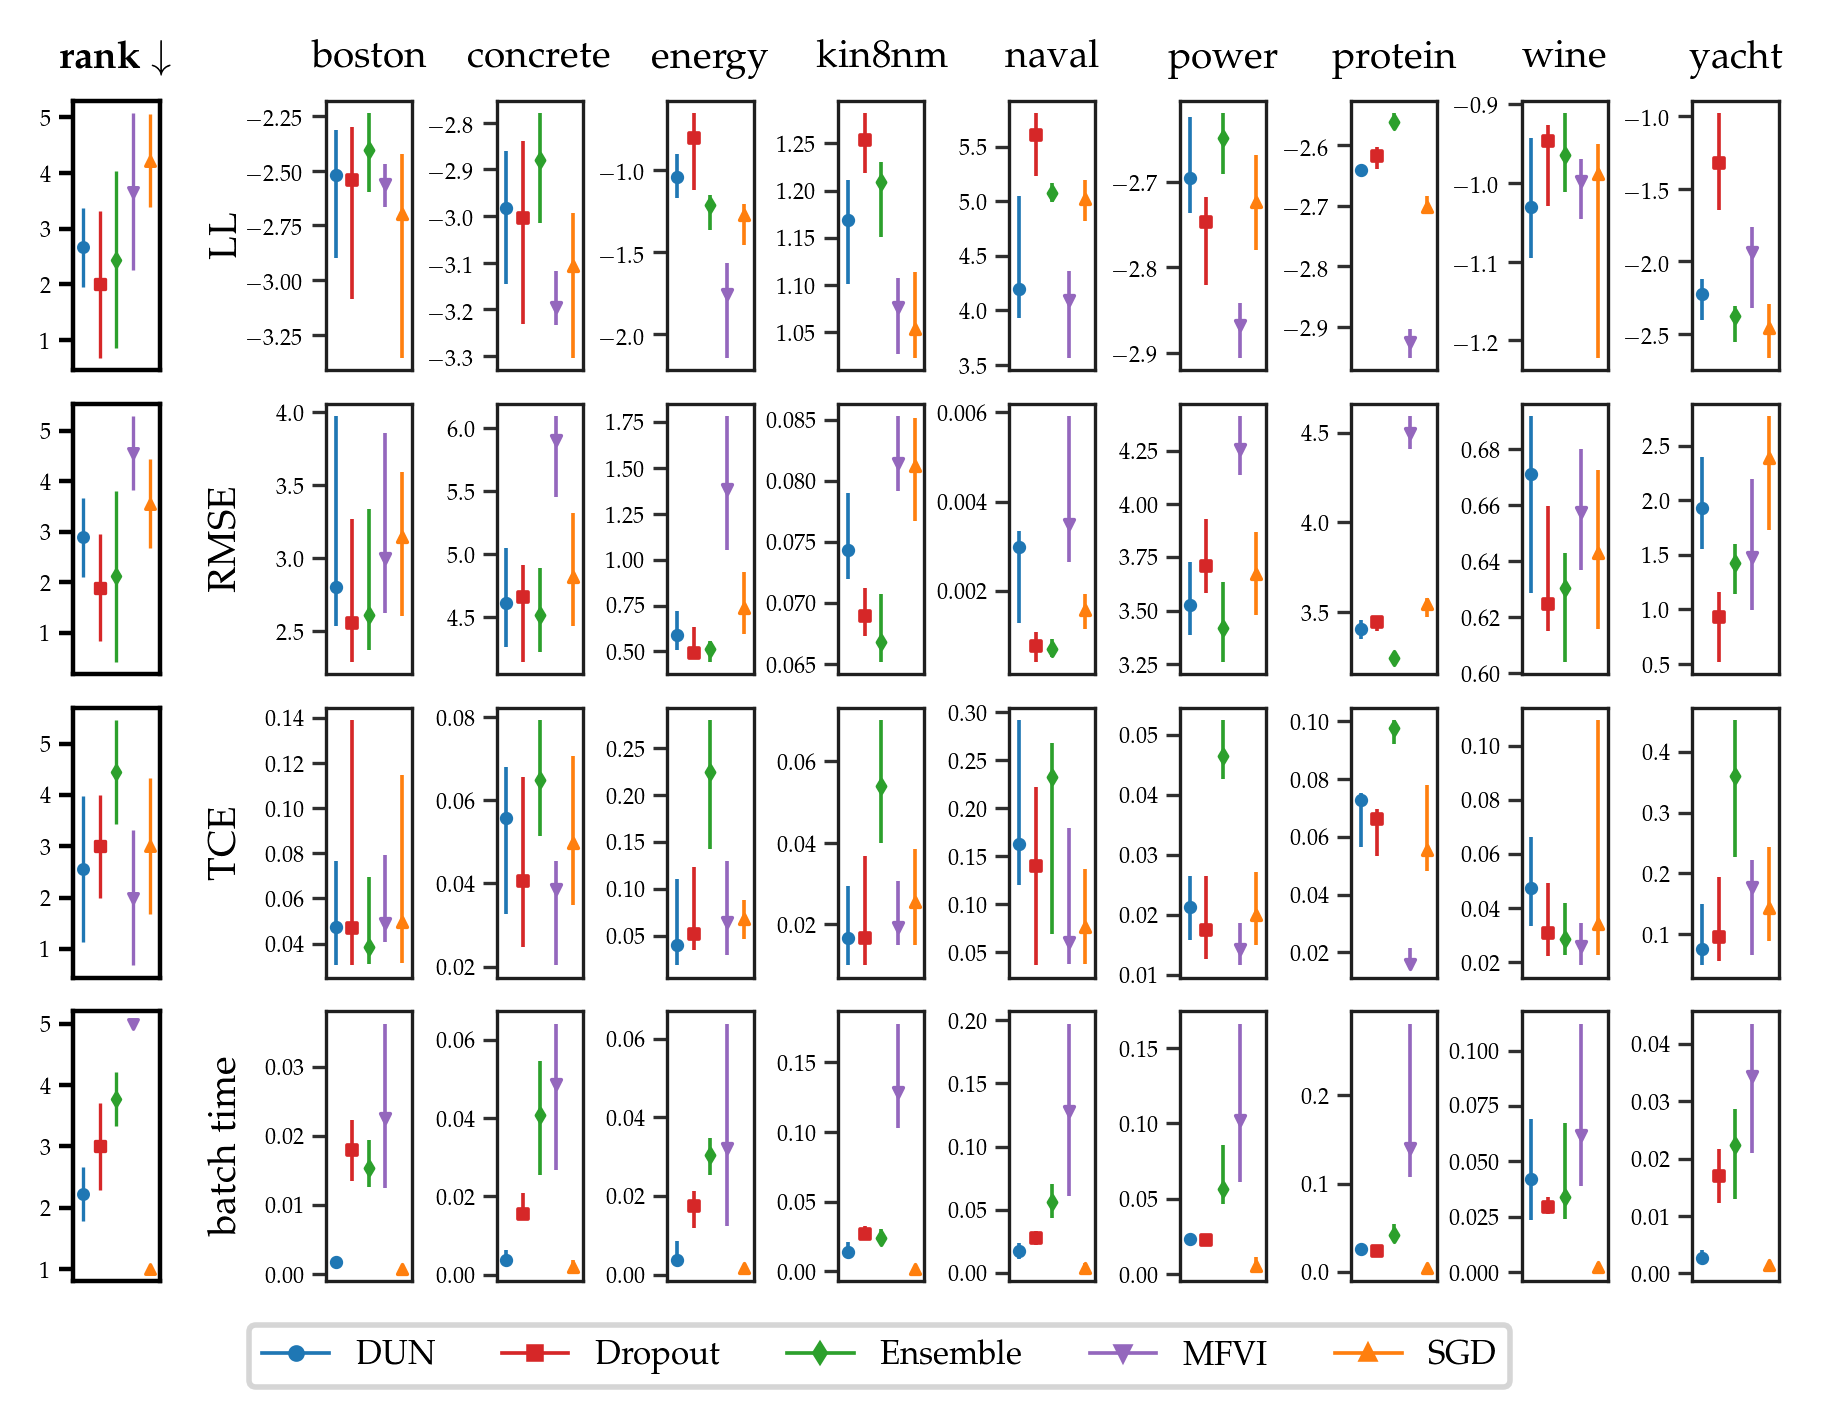

In [27]:
reg_formatting = {
    "DUN": {"color": c[0], "marker": "o", "linestyle": "-"},
    "Dropout": {"color": c[3], "marker": "s", "linestyle": ":"},
    "Ensemble": {"color": c[2], "marker": "d", "linestyle": "-."},
    "MFVI": {"color": c[4], "marker": "v", "linestyle": (0, [4, 2, 1, 2, 1, 2])},
    "SGD": {"color": c[1],  "marker": "^", "linestyle": "--"},
    "DUN (prior)": {"color": c[6], "marker": ">", "linestyle": "-"},
    "DUN (none)": {"color": c[9], "marker": "<", "linestyle": "-"},
}

make_uci_plots(reg_df, reg_formatting, gap=False, nth=0, use_tail=True)

In [10]:
def make_uci_results_table_flights(df, nth=0, network="ResNet", n_ensembles=5, n_samples=10,
                                   width=100, batch_size=128):
    df = df.copy()
    df = df[df.dataset == "flights"]
    df = df[df.width == width]
    df = df[df.batch_size == batch_size]
    df = df[~(~(df.network == network) & ((df.method == "DUN_none") | (df.method == "DUN_prior") | (df.method == "DUN_wd")))]
    df = df[~((df.method == "ensemble") & ~(df.n_samples == n_ensembles))]
    df = df[~((df.method == "Dropout") & ~(df.n_samples == n_samples))]
    df = df[~((df.method == "MFVI") & ~(df.n_samples == n_samples))]
    
    df.method[df.method == "DUN_none"] = "DUN (none)"
    df.method[df.method == "DUN_prior"] = "DUN (prior)"
    df.method[df.method == "DUN_wd"] = "DUN"
    df.method[df.method == "ensemble"] = "Ensemble"
    
    df = df.sort_values("method")
    
    df = df[df.method != "DUN (prior)"]
    df = df[df.method != "DUN (none)"]
    
    df = df[df.split != "800k"]
    
    df = df.rename(columns={"dataset": "Dataset", "method": "Method", "split": "Split"})
    
    df = (df
          .groupby(["Method", "Dataset", "n_samples", "Split", "num"])
          .nth(nth)
          .rename(columns={"ll": "LL", "err": "RMSE", "ece": "RCE", "tail_ece": "TCE", "batch_time": "Time"})
          .groupby(["Method", "Dataset", "n_samples", "Split"])
          .agg({"LL": ["mean", "std"], "RMSE": ["mean", "std"],
                "RCE": ["mean", "std"], "TCE": ["mean", "std"],
                "Time": ["mean", "std"]})
          .reset_index()
         )
    
    df.columns = ['_'.join(t).rstrip('_') for t in df.columns.values]
    cols = ["LL", "RMSE", "RCE", "TCE", "Time"]
    for col in cols:
        df[col] = "$" + df[col + "_mean"].apply("{0:.3f}".format) + " \scriptstyle \pm " + df[col + "_std"].apply(lambda x: "{:4.3f}".format(x)) + "$"
        df = df.drop(columns=[col + "_mean", col + "_std"])
    
    df = df[["Method", "Split", "LL", "RMSE", "RCE", "TCE", "Time"]]
    df = (df.sort_values(["Split"])
            .melt(["Method", "Split"], var_name="Metric", value_name="Value")
            .set_index(["Metric", "Split", "Method"])
            .unstack([1,2])
         )

    df = df.rename(columns={"Ensemble": "\\textsc{Ensemble}", "Dropout": "\\textsc{Dropout}",
                            "DUN": "\\textsc{DUN}",
                            "SGD": "\\textsc{SGD}", "MFVI": "\\textsc{MFVI}"})
    df.columns.name="\\textsc{Metric}" 
    
    return df, df.to_latex(multirow=True, multicolumn=True, escape=False, multicolumn_format='c')

In [11]:
flights_res_df, latex_print_flights = make_uci_results_table_flights(reg_df, n_samples=10, nth=0)
print(latex_print_flights)
flights_res_df

\begin{tabular}{llllll}
\toprule
{} & \multicolumn{5}{c}{Value} \\
Split & \multicolumn{5}{c}{2M} \\
Method &                     \textsc{DUN} &                 \textsc{Dropout} &                \textsc{Ensemble} &                    \textsc{MFVI} &                     \textsc{SGD} \\
Metric &                                  &                                  &                                  &                                  &                                  \\
\midrule
LL     &  $-4.951 \scriptstyle \pm 0.005$ &  $-4.954 \scriptstyle \pm 0.017$ &  $-4.947 \scriptstyle \pm 0.010$ &  $-5.022 \scriptstyle \pm 0.052$ &  $-4.965 \scriptstyle \pm 0.007$ \\
RCE    &   $0.061 \scriptstyle \pm 0.004$ &   $0.067 \scriptstyle \pm 0.011$ &   $0.063 \scriptstyle \pm 0.005$ &   $0.055 \scriptstyle \pm 0.008$ &   $0.058 \scriptstyle \pm 0.005$ \\
RMSE   &  $34.693 \scriptstyle \pm 0.281$ &  $34.283 \scriptstyle \pm 0.105$ &  $34.319 \scriptstyle \pm 0.127$ &  $36.718 \scriptstyle \pm 1.837$ &  

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.h

Value                                   \
Split                                2M                                    
Method                     \textsc{DUN}                 \textsc{Dropout}   
Metric                                                                     
LL      $-4.951 \scriptstyle \pm 0.005$  $-4.954 \scriptstyle \pm 0.017$   
RCE      $0.061 \scriptstyle \pm 0.004$   $0.067 \scriptstyle \pm 0.011$   
RMSE    $34.693 \scriptstyle \pm 0.281$  $34.283 \scriptstyle \pm 0.105$   
TCE      $0.087 \scriptstyle \pm 0.009$   $0.096 \scriptstyle \pm 0.017$   
Time     $0.026 \scriptstyle \pm 0.001$   $0.016 \scriptstyle \pm 0.001$   

                                                                          \
Split                                                                      
Method                \textsc{Ensemble}                    \textsc{MFVI}   
Metric                                                                     
LL      $-4.947 \scriptstyle \pm 0.010$  $-5.022 \scriptstyle \pm 0.052$   
RCE      $0.063 \scriptstyle \pm 0.005$   $0.055 \scriptstyle \pm 0.008$   
RMSE    $34.319 \scriptstyle \pm 0.127$  $36.718 \scriptstyle \pm 1.837$   
TCE      $0.090 \scriptstyle \pm 0.008$   $0.068 \scriptstyle \pm 0.014$   
Time     $0.031 \scriptstyle \pm 0.001$   $0.547 \scriptstyle \pm 0.003$   

                                         
Split                                    
Method                     \textsc{SGD}  
Metric                                   
LL      $-4.965 \scriptstyle \pm 0.007$  
RCE      $0.058 \scriptstyle \pm 0.005$  
RMSE    $34.612 \scriptstyle \pm 0.191$  
TCE      $0.084 \scriptstyle \pm 0.010$  
Time     $0.002 \scriptstyle \pm 0.000$

### Appendix

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launch

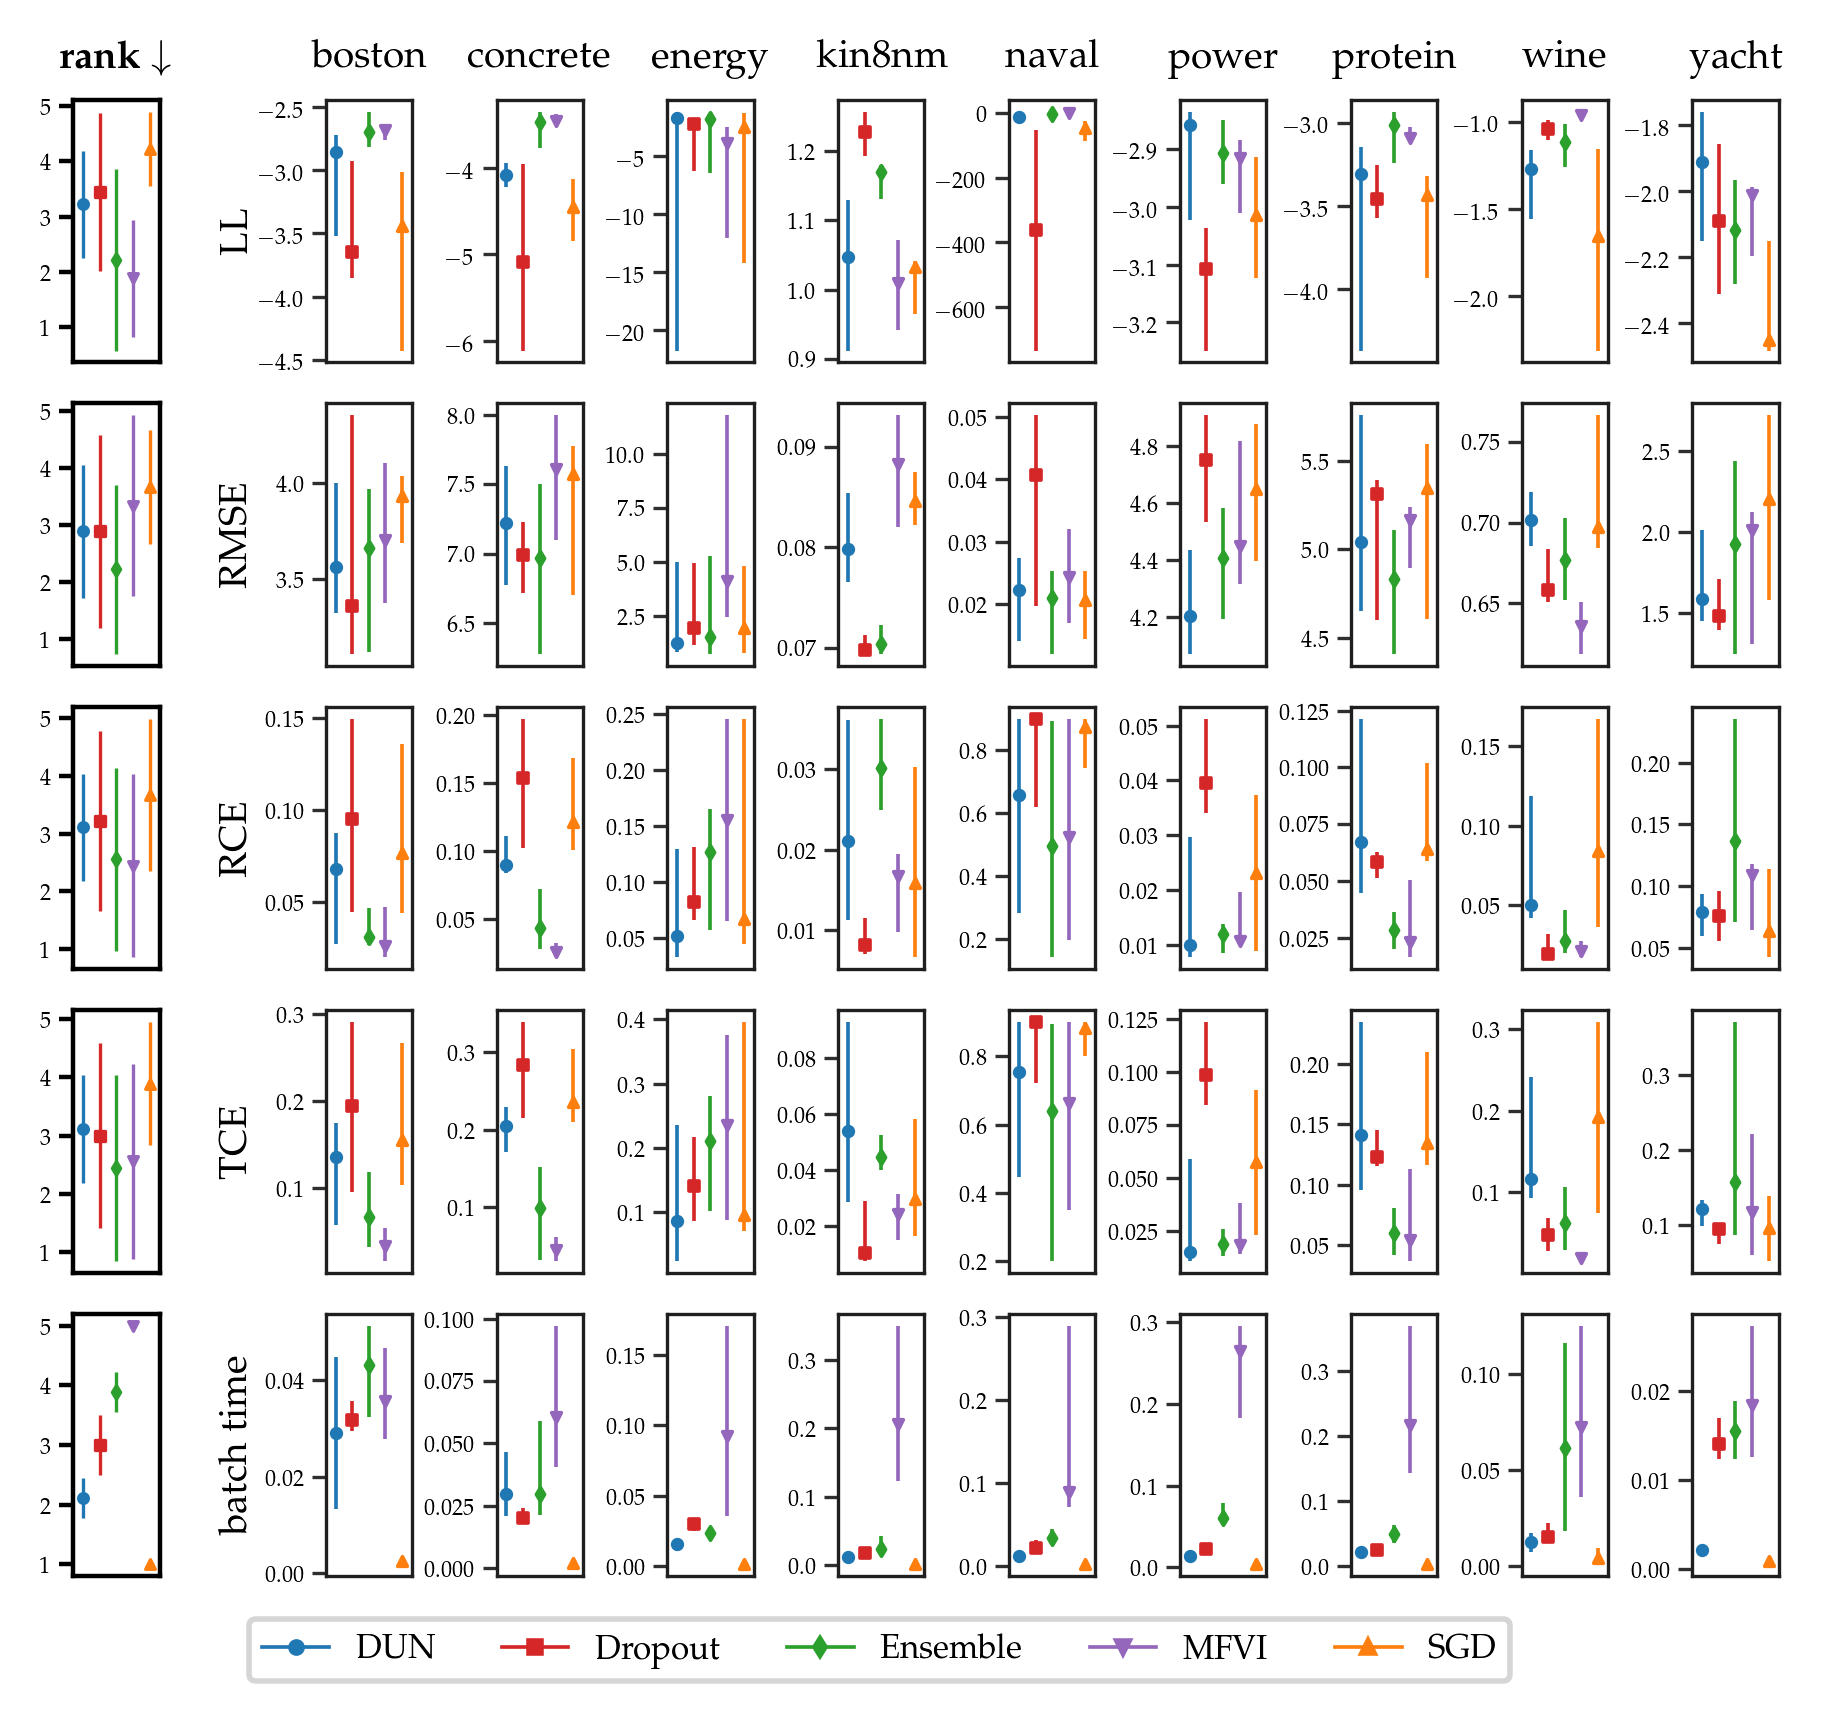

In [110]:
make_uci_plots(reg_df, reg_formatting, gap=True, nth=0, appendix=True)

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


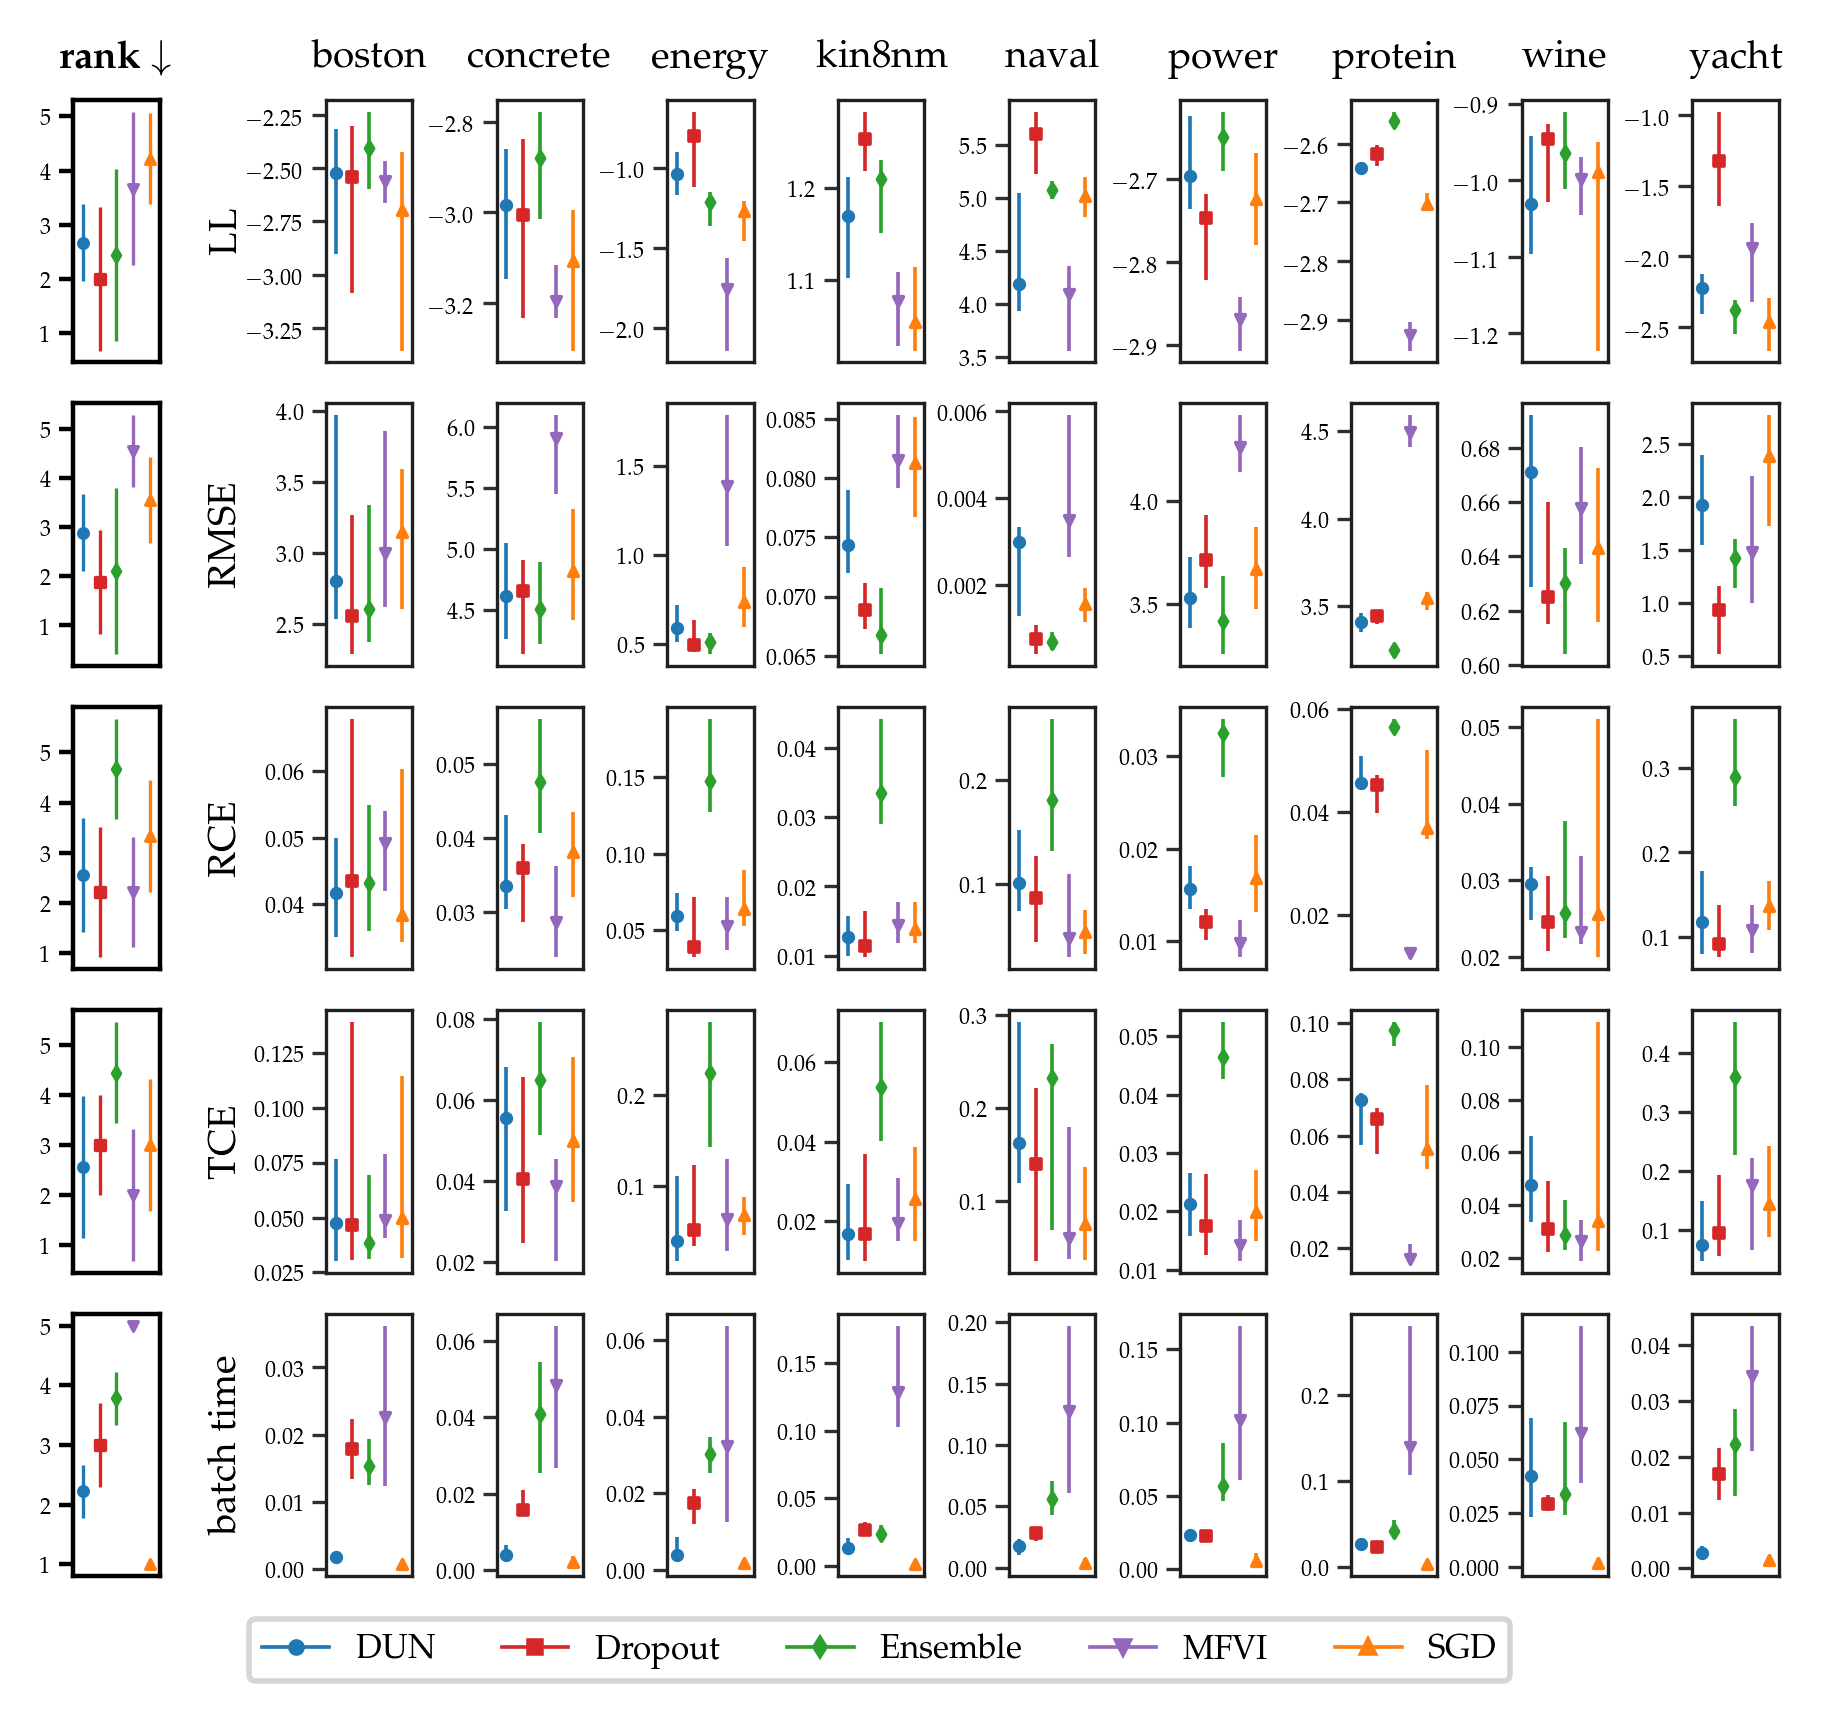

In [109]:
make_uci_plots(reg_df, reg_formatting, gap=False, nth=0, appendix=True)

In [16]:
def plot_parettos_reg(df, stat, formatting, gap=False, nth=0, valprop=0.15, network="ResNet"):
    df = df.copy()
    df = df[~(df.dataset.str.contains("gap"))] if gap == False else df[df.dataset.str.contains("gap")]
    df = df[df.valprop == valprop]
    df = df[~(~(df.network == network) & ((df.method == "DUN_none") | (df.method == "DUN_prior") | (df.method == "DUN_wd")))]
        
    if gap:
        df.dataset = df.dataset.str.split("_", expand=True).iloc[:,0]
    
    df.method[df.method == "DUN_none"] = "DUN (none)"
    df.method[df.method == "DUN_prior"] = "DUN (prior)"
    df.method[df.method == "DUN_wd"] = "DUN"
    df.method[df.method == "ensemble"] = "Ensemble"
    
    df = df.sort_values("method")
    
    df = df[df.method != "DUN (prior)"]
    df = df[df.method != "DUN (none)"]
    
    df = df.rename(columns={"dataset": "Dataset", "method": "Method", "ll": "LL"})
    
    df = (df
          .groupby(["Method", "Dataset", "split", "n_samples", "num"])
          .nth(nth)
          .reset_index()
          .sort_values(["Method", "Dataset", "n_samples"], ascending=[False, True, True])
          .groupby(["Method", "Dataset", "n_samples"], sort=False)
          .mean()
          .reset_index()
         )    
    
    dpi = 400
    scale = 1
    fill = 0.66
    fig, ax = plt.subplots(nrows=3, ncols=3, dpi=dpi, tight_layout=False,
                           figsize=(scale*text_width, scale*text_width*golden_ratio*1.5))
    
    datasets = list(df.Dataset.drop_duplicates())
    for idx, dataset in enumerate(datasets):
        i = idx // 3
        j = idx - i * 3
        
        tmp_df = df[df.Dataset == dataset]


        if j == 0:
            ax[i, j].set_ylabel(stat, fontsize=fs-1)
        if i == 2:
            ax[i, j].set_xlabel("time (s)", fontsize=fs-1)
        ax[i, j].set_title(dataset, fontsize=fs-1)
        ax[i, j].grid(alpha=0.3, axis='both')
        
        methods = ["MFVI", "Dropout", "Ensemble", "SGD", "DUN"]
        for method in methods:            
            if method != "Ensemble":
                rows = tmp_df[tmp_df.Method == method]
            else:
                rows = tmp_df[(tmp_df.Method == "Ensemble") | (tmp_df.Method == "SGD")]

            ax[i, j].plot(rows["batch_time"], rows[stat], lw=0.5, color=formatting[method]["color"],
                    marker=formatting[method]["marker"],
                    linestyle=formatting[method]["linestyle"], ms=2)
        
            
    legend_items = []
    for key, val in formatting.items():
        legend_items.append(mlines.Line2D([], [], color=val["color"], marker=val["marker"],
                                          linestyle=val["linestyle"],
                                          label=key, lw=0.5, ms=2))
    ax[2, 1].legend(handles=legend_items[:5], ncol=5, loc='upper center', 
             bbox_to_anchor=(0.5, -0.35))
    
    fig.align_ylabels()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
#     name = "reg_timing_standard.pdf" if not gap else 'plots/reg_timing_gap.pdf'
#     plt.savefig(name, format='pdf', bbox_inches='tight', pad_inches=0.01)
    plt.show()



/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


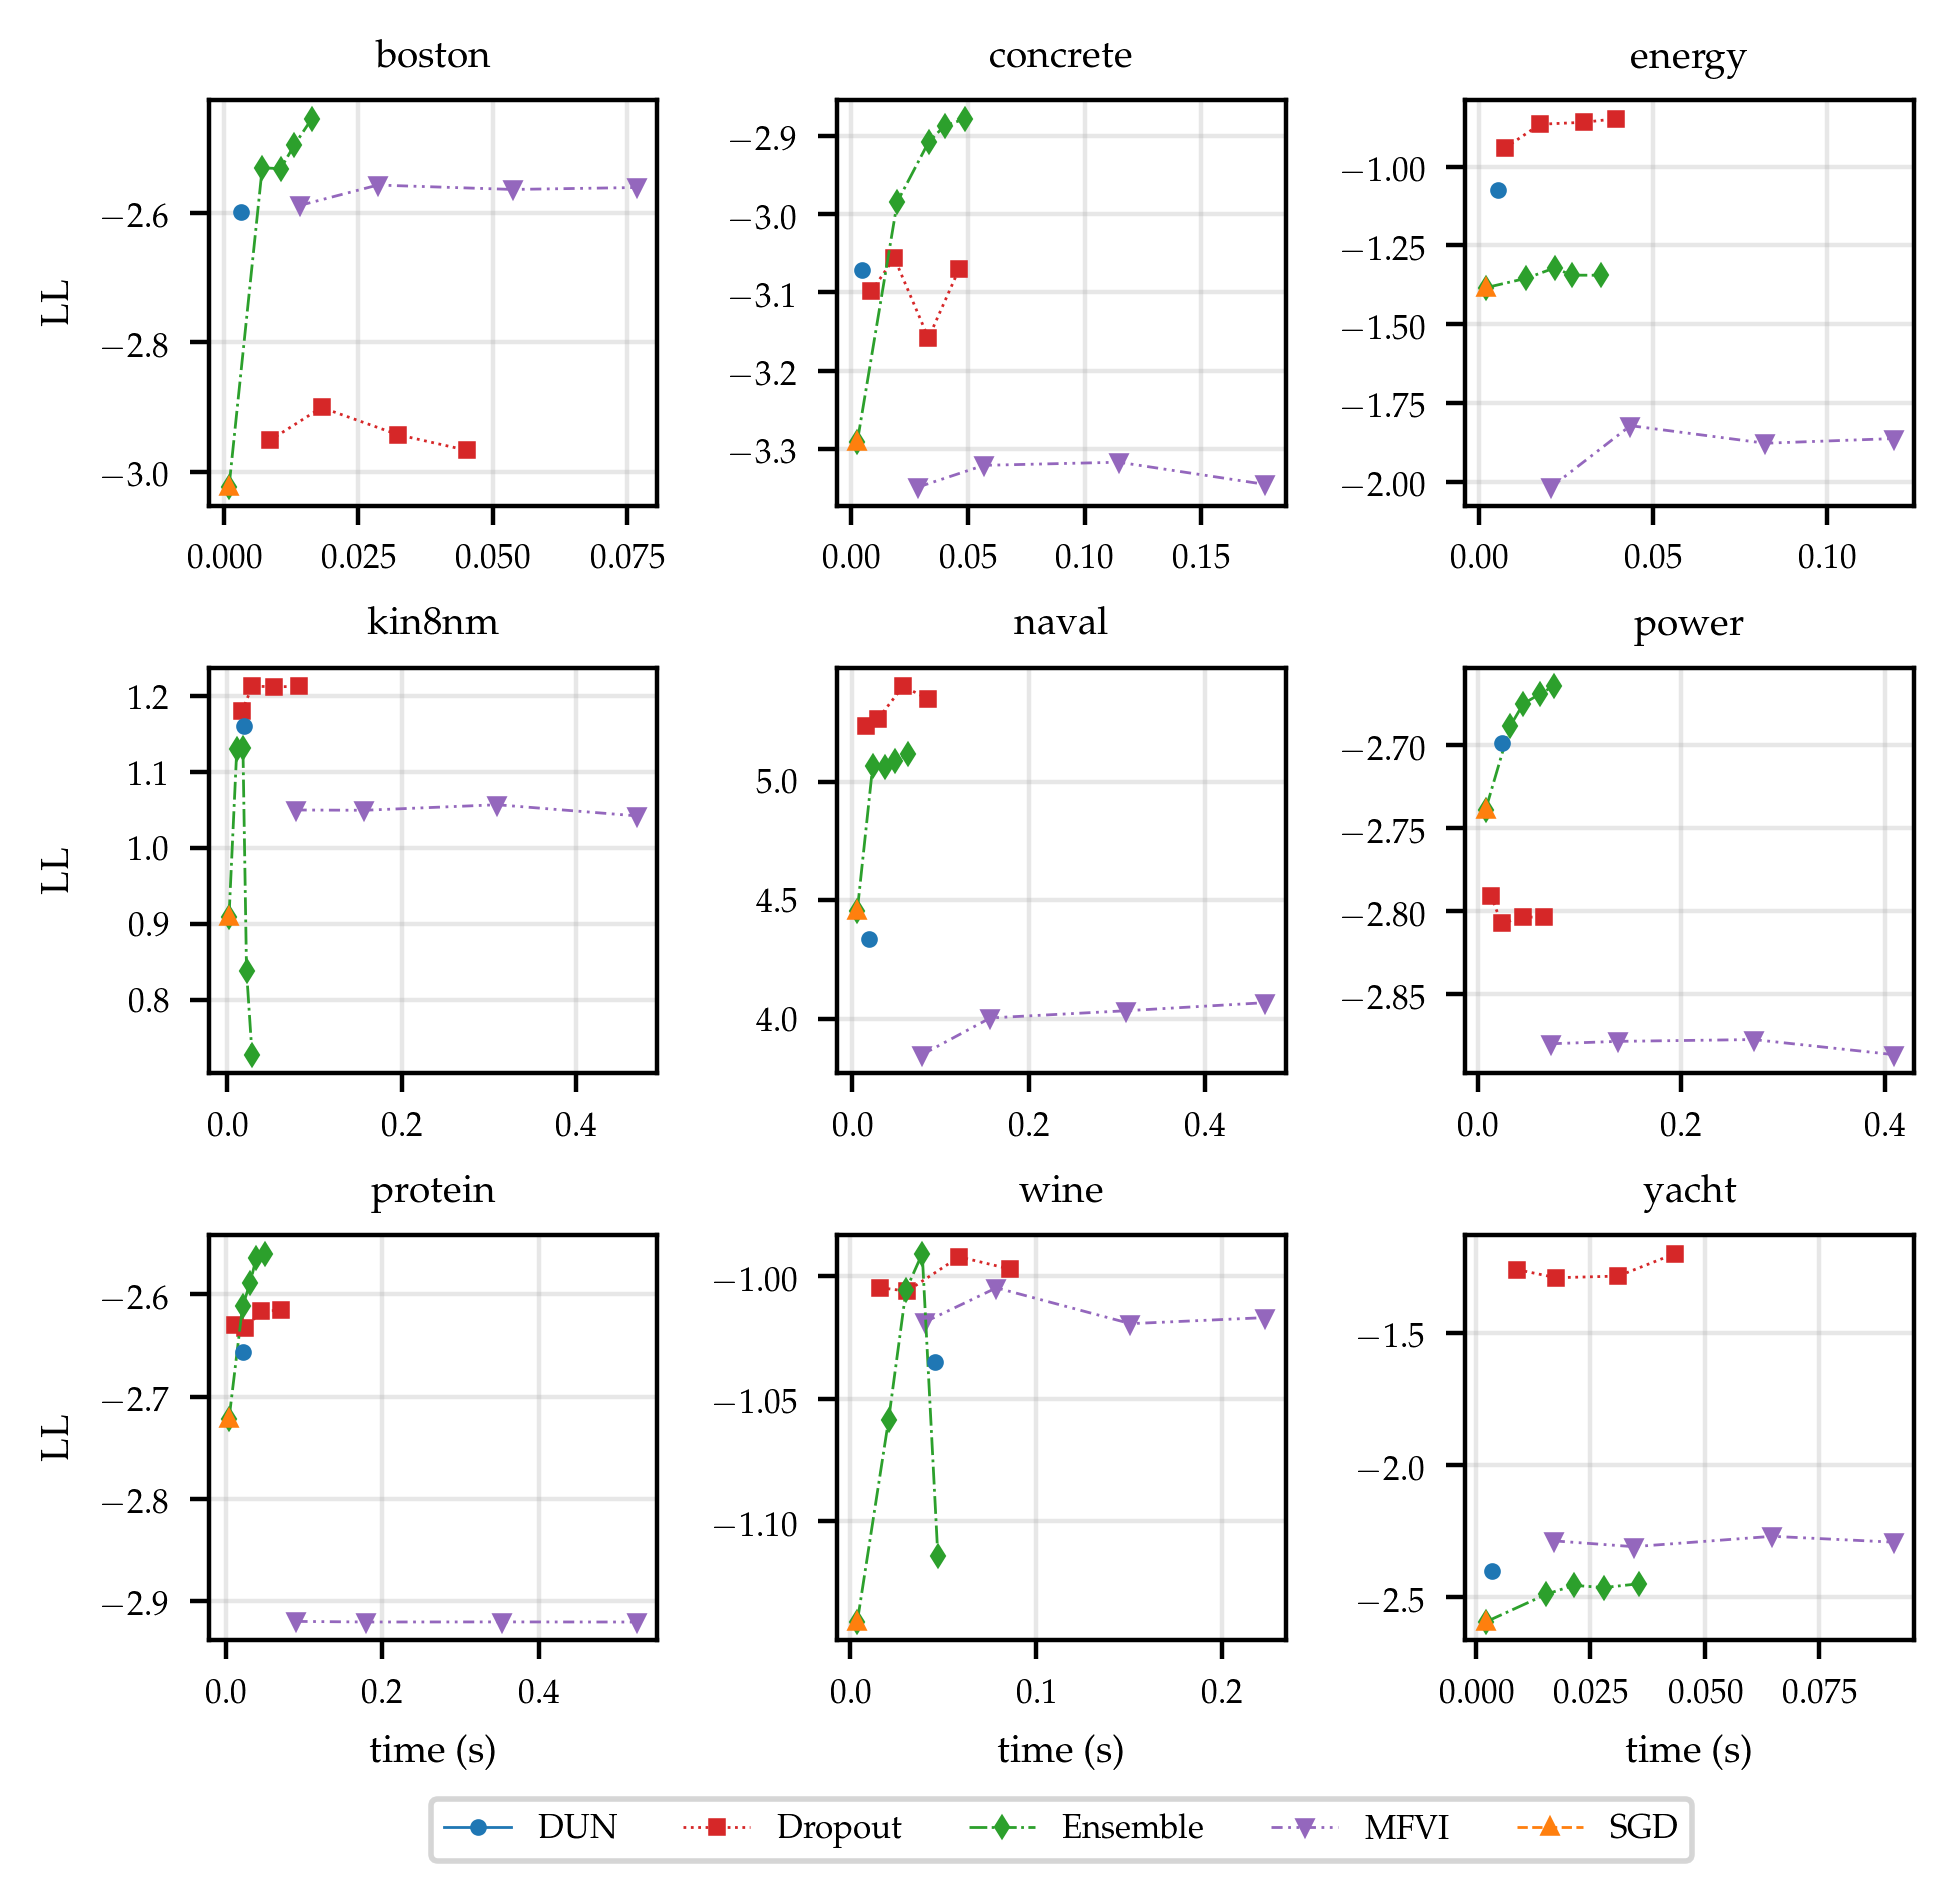

In [17]:
plot_parettos_reg(reg_df, "LL", reg_formatting, gap=False)

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


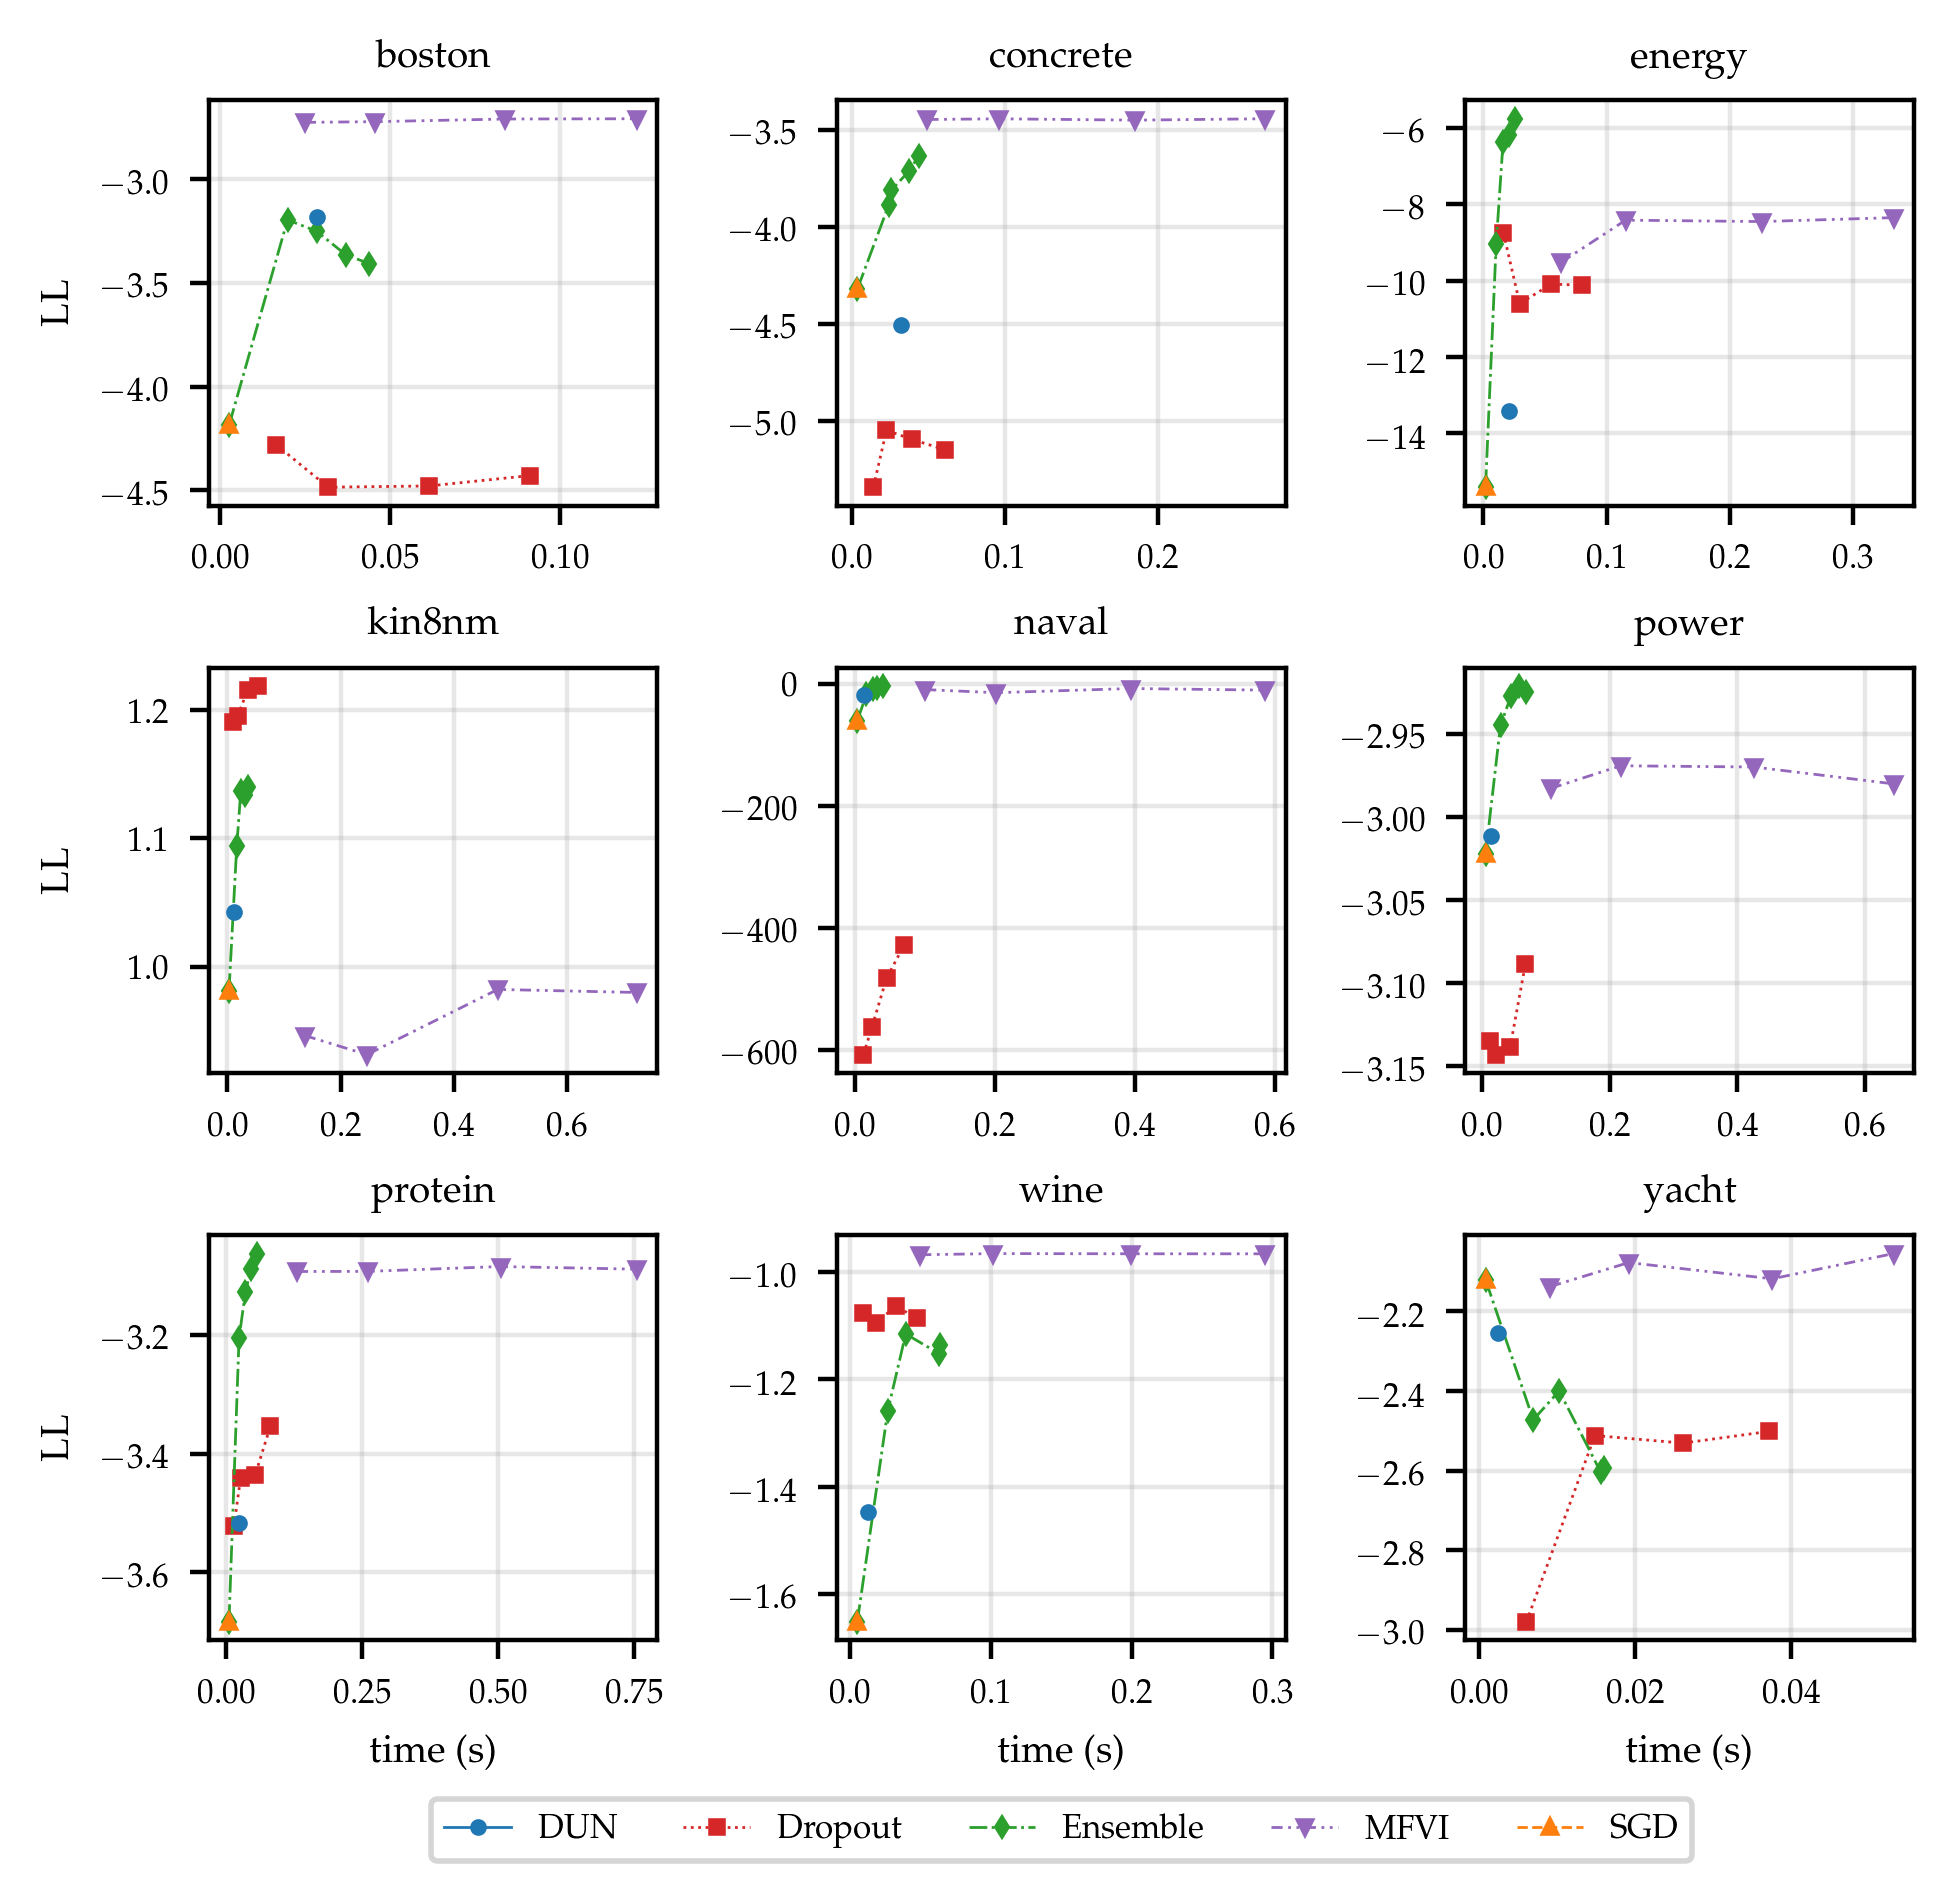

In [18]:
plot_parettos_reg(reg_df, "LL", reg_formatting, gap=True)

In [43]:
def make_uci_appendix_tables(df, gap=False, nth=0, valprop=0.15, n_ensembles=5, n_samples=10):
    df = pd.concat([
        (make_uci_results_table(df, gap, nth, valprop, "ResNet", n_ensembles, n_samples)
         .assign(Network=lambda df: "ResNet")
        ),
        make_uci_results_table(df, gap, nth, valprop, "MLP", n_ensembles, n_samples).assign(Network=lambda df: "MLP")
    ]).reset_index()
        
    df = df[~(~(df.Method == "DUN") & (df.Network == "MLP"))]
    df.Method[((df.Method == "DUN") & (df.Network == "MLP"))] = "DUN (MLP)"
    df = df[["Method", "Dataset", "LL_mean", "LL_std", "RMSE_mean", "RMSE_std",
             "RCE_mean", "RCE_std", "TCE_mean", "TCE_std", "batch time_mean", "batch time_std"]]
    
    cols = ["LL", "RMSE", "RCE", "TCE", "batch time"]
    for col in cols:
        df[col] = "$" + df[col + "_mean"].apply("{0:.3f}".format) + " \scriptstyle \pm " + df[col + "_std"].apply(lambda x: "{:4.3f}".format(x)) + "$"
        df = df.drop(columns=[col + "_mean", col + "_std"])
        
    df = df[~((df.Method == "DUN (none)") | (df.Method == "DUN (prior)"))]
    
    df = (df
            .melt(["Method", "Dataset"], var_name="Metric", value_name="Value")
            .sort_values(["Metric", "Method", "Dataset"])
            .set_index(["Metric", "Method", "Dataset"])
            .unstack([1])
         )
    
    df.index.names = ["\\textsc{Metric}","\\textsc{Dataset}"]
    df = df.rename(columns={"Ensemble": "\\textsc{Ensemble}", "Dropout": "\\textsc{Dropout}",
                            "DUN": "\\textsc{DUN}", "DUN (MLP)": "\\textsc{DUN (MLP)}",
                            "SGD": "\\textsc{SGD}", "MFVI": "\\textsc{MFVI}"})
    df.columns.name="\\textsc{Method}" 
    
    return df, df.to_latex(multirow=True, multicolumn=True, escape=False, multicolumn_format='c', column_format='ll|cccccc')

res_df, print_df = make_uci_appendix_tables(reg_df)
print(print_df)
res_df

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launch

\begin{tabular}{ll|cccccc}
\toprule
           & {} & \multicolumn{6}{c}{Value} \\
           & Method &                     \textsc{DUN} &               \textsc{DUN (MLP)} &                 \textsc{Dropout} &                \textsc{Ensemble} &                    \textsc{MFVI} &                     \textsc{SGD} \\
\textsc{Metric} & \textsc{Dataset} &                                  &                                  &                                  &                                  &                                  &                                  \\
\midrule
\multirow{9}{*}{LL} & boston &  $-2.604 \scriptstyle \pm 0.351$ &  $-2.604 \scriptstyle \pm 0.368$ &  $-2.882 \scriptstyle \pm 1.028$ &  $-2.454 \scriptstyle \pm 0.275$ &  $-2.573 \scriptstyle \pm 0.136$ &  $-2.942 \scriptstyle \pm 0.676$ \\
           & concrete &  $-3.005 \scriptstyle \pm 0.212$ &  $-3.051 \scriptstyle \pm 0.278$ &  $-3.051 \scriptstyle \pm 0.308$ &  $-2.886 \scriptstyle \pm 0.153$ &  $-3.190 \scriptstyle

Value  \
Method                                               \textsc{DUN}   
\textsc{Metric} \textsc{Dataset}                                    
LL              boston            $-2.604 \scriptstyle \pm 0.351$   
                concrete          $-3.005 \scriptstyle \pm 0.212$   
                energy            $-1.037 \scriptstyle \pm 0.159$   
                kin8nm             $1.151 \scriptstyle \pm 0.083$   
                naval              $4.245 \scriptstyle \pm 1.108$   
                power             $-2.695 \scriptstyle \pm 0.086$   
                protein           $-2.657 \scriptstyle \pm 0.044$   
                wine              $-1.031 \scriptstyle \pm 0.119$   
                yacht             $-2.420 \scriptstyle \pm 0.523$   
RCE             boston             $0.045 \scriptstyle \pm 0.016$   
                concrete           $0.037 \scriptstyle \pm 0.011$   
                energy             $0.064 \scriptstyle \pm 0.031$   
                kin8nm             $0.014 \scriptstyle \pm 0.007$   
                naval              $0.134 \scriptstyle \pm 0.102$   
                power              $0.016 \scriptstyle \pm 0.004$   
                protein            $0.048 \scriptstyle \pm 0.005$   
                wine               $0.030 \scriptstyle \pm 0.009$   
                yacht              $0.141 \scriptstyle \pm 0.078$   
RMSE            boston             $3.200 \scriptstyle \pm 0.978$   
                concrete           $4.613 \scriptstyle \pm 0.607$   
                energy             $0.612 \scriptstyle \pm 0.157$   
                kin8nm             $0.076 \scriptstyle \pm 0.005$   
                naval              $0.003 \scriptstyle \pm 0.002$   
                power              $3.573 \scriptstyle \pm 0.254$   
                protein            $3.402 \scriptstyle \pm 0.058$   
                wine               $0.659 \scriptstyle \pm 0.061$   
                yacht              $2.514 \scriptstyle \pm 1.985$   
TCE             boston             $0.053 \scriptstyle \pm 0.034$   
                concrete           $0.054 \scriptstyle \pm 0.027$   
                energy             $0.072 \scriptstyle \pm 0.073$   
                kin8nm             $0.024 \scriptstyle \pm 0.022$   
                naval              $0.212 \scriptstyle \pm 0.159$   
                power              $0.020 \scriptstyle \pm 0.007$   
                protein            $0.069 \scriptstyle \pm 0.012$   
                wine               $0.051 \scriptstyle \pm 0.028$   
                yacht              $0.122 \scriptstyle \pm 0.119$   
batch time      boston             $0.003 \scriptstyle \pm 0.003$   
                concrete           $0.005 \scriptstyle \pm 0.003$   
                energy             $0.007 \scriptstyle \pm 0.008$   
                kin8nm             $0.019 \scriptstyle \pm 0.014$   
                naval              $0.019 \scriptstyle \pm 0.010$   
                power              $0.024 \scriptstyle \pm 0.007$   
                protein            $0.022 \scriptstyle \pm 0.008$   
                wine               $0.046 \scriptstyle \pm 0.026$   
                yacht              $0.004 \scriptstyle \pm 0.003$   

                                                                   \
Method                                         \textsc{DUN (MLP)}   
\textsc{Metric} \textsc{Dataset}                                    
LL              boston            $-2.604 \scriptstyle \pm 0.368$   
                concrete          $-3.051 \scriptstyle \pm 0.278$   
                energy            $-1.564 \scriptstyle \pm 0.383$   
                kin8nm             $1.111 \scriptstyle \pm 0.103$   
                naval              $4.472 \scriptstyle \pm 1.239$   
                power             $-2.719 \scriptstyle \pm 0.069$   
                protein           $-2.692 \scriptstyle \pm 0.020$   
                wine              $-0.979 \scriptstyle \p

In [44]:
res_df, print_df = make_uci_appendix_tables(reg_df, gap=True)
print(print_df)
res_df

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launch

\begin{tabular}{ll|cccccc}
\toprule
           & {} & \multicolumn{6}{c}{Value} \\
           & Method &                       \textsc{DUN} &                 \textsc{DUN (MLP)} &                     \textsc{Dropout} &                \textsc{Ensemble} &                      \textsc{MFVI} &                       \textsc{SGD} \\
\textsc{Metric} & \textsc{Dataset} &                                    &                                    &                                      &                                  &                                    &                                    \\
\midrule
\multirow{9}{*}{LL} & boston &    $-3.107 \scriptstyle \pm 0.593$ &    $-3.033 \scriptstyle \pm 0.409$ &      $-4.001 \scriptstyle \pm 1.814$ &  $-3.106 \scriptstyle \pm 1.481$ &    $-2.703 \scriptstyle \pm 0.072$ &    $-4.217 \scriptstyle \pm 1.876$ \\
           & concrete &    $-4.222 \scriptstyle \pm 0.818$ &    $-4.152 \scriptstyle \pm 0.433$ &      $-5.170 \scriptstyle \pm 1.376$ &  $-3.631 \sc

Value  \
Method                                                 \textsc{DUN}   
\textsc{Metric} \textsc{Dataset}                                      
LL              boston              $-3.107 \scriptstyle \pm 0.593$   
                concrete            $-4.222 \scriptstyle \pm 0.818$   
                energy            $-10.730 \scriptstyle \pm 13.477$   
                kin8nm               $1.029 \scriptstyle \pm 0.133$   
                naval             $-16.279 \scriptstyle \pm 19.437$   
                power               $-2.998 \scriptstyle \pm 0.325$   
                protein             $-3.835 \scriptstyle \pm 0.998$   
                wine                $-1.417 \scriptstyle \pm 0.474$   
                yacht               $-2.122 \scriptstyle \pm 0.584$   
RCE             boston               $0.072 \scriptstyle \pm 0.047$   
                concrete             $0.108 \scriptstyle \pm 0.066$   
                energy               $0.120 \scriptstyle \pm 0.149$   
                kin8nm               $0.027 \scriptstyle \pm 0.021$   
                naval                $0.580 \scriptstyle \pm 0.321$   
                power                $0.027 \scriptstyle \pm 0.039$   
                protein              $0.087 \scriptstyle \pm 0.053$   
                wine                 $0.076 \scriptstyle \pm 0.057$   
                yacht                $0.085 \scriptstyle \pm 0.036$   
RMSE            boston               $3.636 \scriptstyle \pm 0.493$   
                concrete             $7.196 \scriptstyle \pm 0.821$   
                energy               $2.938 \scriptstyle \pm 3.017$   
                kin8nm               $0.080 \scriptstyle \pm 0.006$   
                naval                $0.022 \scriptstyle \pm 0.014$   
                power                $4.299 \scriptstyle \pm 0.416$   
                protein              $5.206 \scriptstyle \pm 0.780$   
                wine                 $0.697 \scriptstyle \pm 0.043$   
                yacht                $1.851 \scriptstyle \pm 0.750$   
TCE             boston               $0.138 \scriptstyle \pm 0.092$   
                concrete             $0.212 \scriptstyle \pm 0.094$   
                energy               $0.175 \scriptstyle \pm 0.211$   
                kin8nm               $0.064 \scriptstyle \pm 0.051$   
                naval                $0.650 \scriptstyle \pm 0.284$   
                power                $0.055 \scriptstyle \pm 0.088$   
                protein              $0.167 \scriptstyle \pm 0.088$   
                wine                 $0.153 \scriptstyle \pm 0.104$   
                yacht                $0.133 \scriptstyle \pm 0.058$   
batch time      boston               $0.029 \scriptstyle \pm 0.018$   
                concrete             $0.033 \scriptstyle \pm 0.018$   
                energy               $0.021 \scriptstyle \pm 0.021$   
                kin8nm               $0.012 \scriptstyle \pm 0.007$   
                naval                $0.013 \scriptstyle \pm 0.006$   
                power                $0.013 \scriptstyle \pm 0.002$   
                protein              $0.023 \scriptstyle \pm 0.006$   
                wine                 $0.013 \scriptstyle \pm 0.007$   
                yacht                $0.003 \scriptstyle \pm 0.002$   

                                                                     \
Method                                           \textsc{DUN (MLP)}   
\textsc{Metric} \textsc{Dataset}                                      
LL              boston              $-3.033 \scriptstyle \pm 0.409$   
                concrete            $-4.152 \scriptstyle \pm 0.433$   
                energy              $-6.477 \scriptstyle \pm 7.516$   
                kin8nm               $1.110 \scriptstyle \pm 0.073$   
                naval             $-19.165 \scriptstyle \pm 11.324$   
                power               $-2.961 \scriptstyle \pm 0.089$   
              

# Image Plots

## Load image results data

In [21]:
from pathlib import Path
import pandas as pd

In [22]:
img_results_dir = Path('image/results')

img_res_paths = list(img_results_dir.glob('*.csv'))

img_dfs = []
for path in img_res_paths:
    img_dfs.append(pd.read_csv(path))

img_df = pd.concat(img_dfs)
img_df

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


,auc_roc,batch_size,batch_time,best_or_last,brier,corruption,dataset,ece,err,err_props,...,n_samples,number,p_drop,rotation,start,stop,target_dataset,use_no_train_post,warmup,wd
0,NaN,NaN,NaN,best,0.114014,0.0,CIFAR10,0.047413,0.064300,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
1,NaN,NaN,NaN,best,0.253867,1.0,CIFAR10,0.110521,0.144229,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
2,NaN,NaN,NaN,best,0.387323,2.0,CIFAR10,0.174362,0.218200,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
3,NaN,NaN,NaN,best,0.577526,3.0,CIFAR10,0.265775,0.323858,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
4,NaN,NaN,NaN,best,0.641503,4.0,CIFAR10,0.297241,0.358513,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
5,NaN,NaN,NaN,best,0.743839,5.0,CIFAR10,0.347433,0.413900,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
6,0.880383,NaN,NaN,best,NaN,NaN,CIFAR10,NaN,NaN,NaN,...,1,3,0.0,NaN,NaN,NaN,SVHN,NaN,0,False
7,NaN,NaN,NaN,last,0.115871,0.0,CIFAR10,0.047155,0.067400,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
8,NaN,NaN,NaN,last,0.253559,1.0,CIFAR10,0.110378,0.143558,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False
9,NaN,NaN,NaN,last,0.386062,2.0,CIFAR10,0.173739,0.216846,NaN,...,1,3,0.0,0.0,NaN,NaN,NaN,NaN,0,False


In [24]:
def plot_err_props(df, conditions, add_cond, ax, formatting, **kwargs):
    filt = (df[list(conditions)] == pd.Series(conditions)).all(axis=1)
    df_filt = df[filt].dropna(subset=['err_props'])
    
    df_filt[df_filt.use_no_train_post == True].method = "DUN (exact)"
    
    for idx, method in enumerate(list(add_cond)):
        filt_add = (df_filt[list(add_cond[method])] == pd.Series(add_cond[method])).all(axis=1)
        df_filt_add = df_filt[filt_add]
        meth_filt = method
        if "DUN" in meth_filt: meth_filt = "DUN"
        err_props_list = np.array([[1 - float(number) for number in row["err_props"][1:-2].split(" ") if number != '']
         for _, row in df_filt_add[df_filt_add.method == meth_filt].iterrows()])
        
        mean = np.mean(err_props_list, axis=0)
        std = np.std(err_props_list, axis=0)
        errorfill(np.arange(0, 1, 0.005), mean, std, alpha_fill=0.2, color=formatting[method]["color"],
                  linestyle=formatting[method]["linestyle"], ax=ax, **kwargs)

    if conditions["dataset"] == "Fashion" or conditions["dataset"] == "MNIST": 
        rejection_step = np.arange(0, 0.5, 0.005)
        theoretical_maximum = 1 / (2 - 2*rejection_step)
    elif conditions["dataset"] == "CIFAR10" or conditions["dataset"] == "CIFAR100":
        rejection_step = np.arange(0, 1-0.27753, 0.005)
        theoretical_maximum = (10000)/((10000 + 26032)*(1-rejection_step))
    elif conditions["dataset"] == "SVHN":
        rejection_step = np.arange(0, 1-0.72247, 0.005)
        theoretical_maximum = (26032)/((10000 + 26032)*(1-rejection_step))
        
        
    ax.plot(rejection_step, theoretical_maximum, color="k", lw=1, **kwargs)

In [25]:
def plot_rot_stats(df, stat, conditions, add_cond, ax, formatting, **kwargs):
    filt = (df[list(conditions)] == pd.Series(conditions)).all(axis=1)
    df_filt = df[filt].dropna(subset=[stat]).copy()
    df_filt = df_filt[df_filt.corruption == 0.]
    df_filt = df_filt[df_filt.dataset == "MNIST"]
    
    for idx, method in enumerate(list(add_cond)):
        filt_add = (df_filt[list(add_cond[method])] == pd.Series(add_cond[method])).all(axis=1)
        df_filt_add = df_filt[filt_add]
        meth_filt = method
        if "DUN" in meth_filt: meth_filt = "DUN"
        
        
        rot_stats = df_filt_add[df_filt_add.method == meth_filt].groupby(['rotation'])[stat]
        mean = rot_stats.mean()
        std = rot_stats.std()
        
        errorfill(np.arange(0, 181, 15), mean, std, alpha_fill=0.2, color=formatting[method]["color"],
                  linestyle=formatting[method]["linestyle"], ax=ax, **kwargs)
        

In [26]:
def plot_cor_stats(df, stat, conditions, add_cond, ax, formatting, cifar="10", **kwargs):
    filt = (df[list(conditions)] == pd.Series(conditions)).all(axis=1)
    df_filt = df[filt].dropna(subset=[stat]).copy()
    df_filt = df_filt[df_filt.rotation == 0.]
    df_filt = df_filt[df_filt.dataset == "CIFAR" + cifar]
    
    for idx, method in enumerate(list(add_cond)):
        filt_add = (df_filt[list(add_cond[method])] == pd.Series(add_cond[method])).all(axis=1)
        df_filt_add = df_filt[filt_add]
        meth_filt = method
        if "DUN" in meth_filt: meth_filt = "DUN"
        
        
        rot_stats = df_filt_add[df_filt_add.method == meth_filt].groupby(['corruption'])[stat]
        mean = rot_stats.mean()
        std = rot_stats.std()
        
        x = np.arange(0, 6, 1)
        errorfill(x, mean, std, alpha_fill=0.2, lw=0.6, color=formatting[method]["color"],
                  linestyle=formatting[method]["linestyle"], ax=ax, **kwargs)
        ax.scatter(x, mean, s=4, color=formatting[method]["color"], marker=formatting[method]["marker"], **kwargs)

In [27]:
def plot_paretto(df, stat, cor, conditions, add_cond, ax, formatting, cifar="10", label_offset=0.05, **kwargs):
    filt = (df[list(conditions)] == pd.Series(conditions)).all(axis=1)
    df_filt = df[filt].copy()
    df_filt = df_filt[df_filt.dataset == "CIFAR" + cifar]
    df_filt = df_filt[(df_filt.corruption == cor) | (df_filt.batch_size == 256.)]

    for idx, method in enumerate(list(add_cond)):
        filt_add = (df_filt[list(add_cond[method])] == pd.Series(add_cond[method])).all(axis=1)
        df_filt_add = df_filt[filt_add]
        meth_filt = method
        if "DUN" in meth_filt: meth_filt = "DUN"
        if "dropout" in meth_filt: meth_filt = "dropout"
        
        filt2 = (df_filt_add.method == meth_filt)
        if meth_filt == "ensemble":
            filt2 = filt2 | (df_filt_add.method == "SGD")
        
        rot_stats = df_filt_add[filt2].groupby(["n_samples"])
        means = rot_stats.mean().reset_index()[["batch_time", stat, "n_samples"]]
        
        ax.plot(means["batch_time"], means[stat], lw=0.6, color=formatting[method]["color"], marker=formatting[method]["marker"],
                   linestyle=formatting[method]["linestyle"], ms=2, **kwargs)
        if method == "ensemble" or method == "dropout":
            for _, row in means.iterrows():
                if method == "ensemble" and int(row["n_samples"]) == 1: continue
                    
                ax.text(row["batch_time"]-label_offset, row[stat]+label_offset,
                        int(row["n_samples"]), fontsize=fs_m1, clip_on=True)

## Image Main Plot

In [28]:
formatting = {
    "DUN": {"color": c[0], "linestyle": "-", "marker": "o", "label": "DUN"},
    "ensemble": {"color": c[2], "linestyle": "-.", "marker": "o", "label": "Ensemble"}, 
    "dropout": {"color": c[3], "linestyle": ":", "marker": "o", "label": "Dropout"}, 
    "SGD": {"color": c[1], "linestyle": "--", "marker": "o", "label": "SGD"},
    "DUN (exact)": {"color": c[6], "linestyle": (0, [6, 2, 1, 2, 1, 2]), "marker": "o", "label": "DUN (exact)"},
    "dropout (0.3)": {"color": c[7], "linestyle": ":", "marker": "p", "label": "Dropout (0.3)"},
}


/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


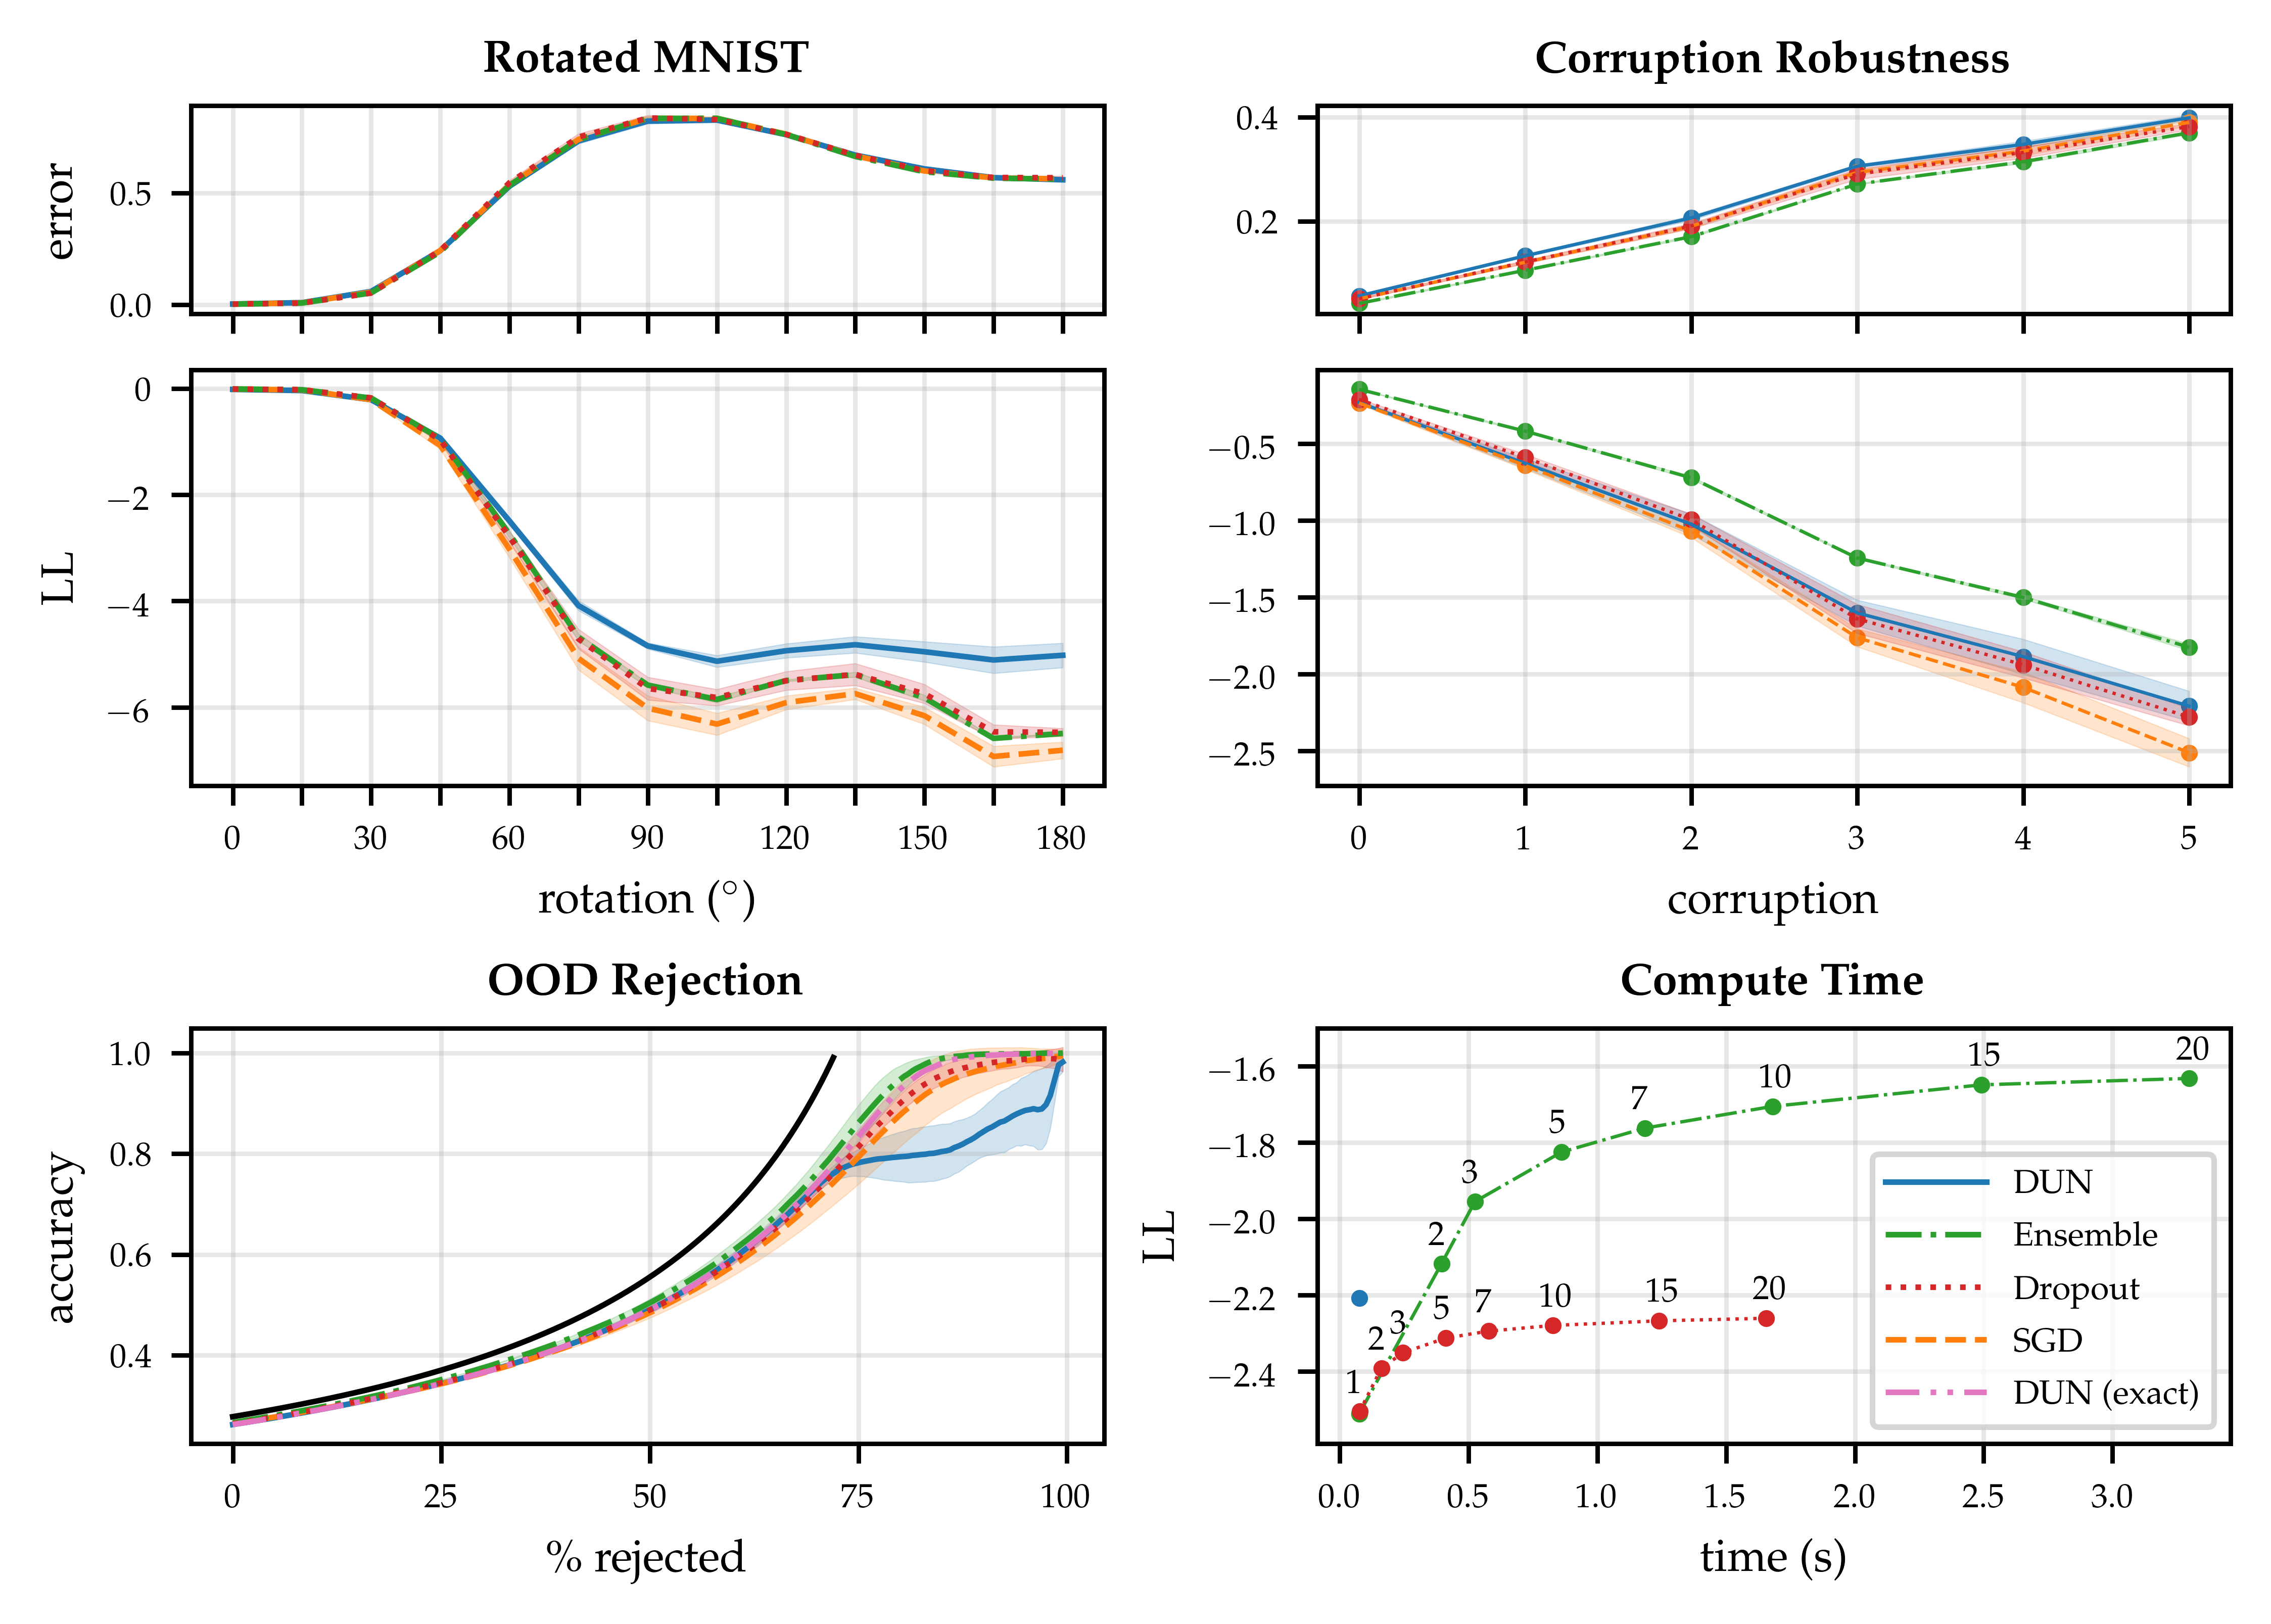

In [29]:
MNIST_warm = 3.

add_cond = {
    "DUN": {"start": 1, "stop": 13, "warmup": 0, "use_no_train_post": False},
    "SGD": {},
    "ensemble": {"n_samples": 5},
    "dropout": {"n_samples": 10, "p_drop": 0.1},
}

scale=1
dpi = 800

fig = plt.figure(constrained_layout=True, dpi=dpi,
                 figsize=(scale*text_width, 2*scale*text_width*golden_ratio/1.6))

gs = GridSpec(11, 12, figure=fig)
ax1 = plt.subplot(gs.new_subplotspec((0, 0), rowspan=2, colspan=6))
ax2 = plt.subplot(gs.new_subplotspec((0, 6), rowspan=2, colspan=6))
ax3 = plt.subplot(gs.new_subplotspec((2, 0), rowspan=4, colspan=6), sharex=ax1)
ax4 = plt.subplot(gs.new_subplotspec((2, 6), rowspan=4, colspan=6), sharex=ax2)
ax5 = plt.subplot(gs.new_subplotspec((6, 0), rowspan=4, colspan=6))
ax6 = plt.subplot(gs.new_subplotspec((6, 6), rowspan=4, colspan=6))

ax1.grid(alpha=0.3, axis='both')
ax2.grid(alpha=0.3, axis='both')
ax3.grid(alpha=0.3, axis='both')
ax4.grid(alpha=0.3, axis='both')
ax5.grid(alpha=0.3, axis='both')
ax6.grid(alpha=0.3, axis='both')

add_cond_mnist = add_cond.copy()
add_cond_mnist["DUN"] = {"start": 1, "stop": 13, "warmup": MNIST_warm, "use_no_train_post": False}
plot_rot_stats(img_df, "err", {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_mnist, ax1, formatting)
plot_rot_stats(img_df, "ll", {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_mnist, ax3, formatting)

ax1.set_title("\\textbf{Rotated MNIST}")
ax1.set_ylabel("error")
ax1.tick_params(axis='x', labelbottom=False)

ax3.set_ylabel("LL")
ax3.set_xlabel("rotation ($^{\\circ}$)")
ax3.set_xticks(range(0, 181, 15))
ax3.set_xticklabels([str(i) if i % 2 == 0 else "" for i in range(0, 181, 15)])

plot_cor_stats(img_df, "err", {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond, ax2, formatting)
plot_cor_stats(img_df, "ll", {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond, ax4, formatting)

ax2.set_title("\\textbf{Corruption Robustness}")
ax2.tick_params(axis='x', labelbottom=False)

ax4.set_xlabel("corruption")


add_cond_rej = add_cond.copy()
add_cond_rej["DUN (exact)"] = {"start": 1, "stop": 13, "warmup": 0, "use_no_train_post": True}
plot_err_props(img_df, {"dataset": "CIFAR10", "target_dataset": "SVHN", "best_or_last": "last",
                        "wd": 1., "model": "res50"},
               add_cond_rej, ax5, formatting)

add_cond_paretto = {
    "SGD": {},
    "ensemble": {},
    "dropout": {"p_drop": 0.1},
    "DUN": {"start": 1, "stop": 13, "warmup": 0, "use_no_train_post": False},
}
plot_paretto(img_df, "ll", 5., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto, ax6, formatting)


ax5.set_title("\\textbf{OOD Rejection}")
ax5.set_xlabel("$\%$ rejected")
ax5.set_ylabel("accuracy")
ax5.set_xticks([0., .25, .50, .75,  1.0])
ax5.set_xticklabels(["0", "25", "50", "75", "100"])

ax6.set_title("\\textbf{Compute Time}")
ax6.set_xlabel("time (s)")
ax6.set_ylabel("LL")
ax6.set_ylim([-2.59, -1.5])

legend_items = []
for key, val in formatting.items():
    if key == "dropout (0.3)": continue
    legend_items.append(mlines.Line2D([], [], color=val["color"],
                                      linestyle=val["linestyle"], label=val["label"], lw=1, ms=1))

ax6.legend(handles=legend_items, handlelength=3)

fig.align_ylabels()

# plt.savefig('img_res_main.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

## Image Appendix

### Table

In [30]:
def filter_img_results(df, model='res50', best_or_last='last', p_drop=0.3, n_samples=20,
                       n_elements=5, wd=True, start=1., stop=13.):
    df = df[(df.model == model) & (df.best_or_last == best_or_last) & (df.wd == wd)]
    df = df[~((df.method == "dropout") & (df.p_drop != p_drop))]
    df = df[~((df.method == "dropout") & (df.n_samples != n_samples))]
    df = df[~((df.method == "ensemble") & (df.n_samples != n_elements))]
    df = df[~((df.method == "DUN") & ((df.start != start) | (df.stop != stop)))]
    
    return df

In [32]:
def create_standard_img_results_table(df, cols, model='res50', best_or_last='last', n_samples=10,
                                      n_elements=5, wd=True, start=1., stop=13.):
    # filter out rotations and corruptions
    df = df[(df.rotation == 0.) & (df.corruption == 0.)]
    
    # filter to match choices
    df_drop01 = filter_img_results(df, model=model, best_or_last=best_or_last, p_drop=0.1, n_samples=n_samples,
                           n_elements=n_elements, wd=wd, start=start, stop=stop)
    
    df_drop03 = filter_img_results(df, model=model, best_or_last=best_or_last, p_drop=0.3, n_samples=n_samples,
                           n_elements=n_elements, wd=wd, start=start, stop=stop)

    df_drop03 = df_drop03[(df_drop03.method == "dropout")]
    df_drop03.method[(df_drop03.method == "dropout")] = "dropout (0.3)"

    df = pd.concat([df_drop01, df_drop03])
    
    df = df[~((df.method == "DUN") & ((df.warmup == 0.) | (df.warmup == 1.)) & ((df.dataset == "MNIST") | (df.dataset == "Fashion")))]
    df = df[~((df.method == "DUN") & ((df.warmup == 3.) | (df.warmup == 1.)) & ~((df.dataset == "MNIST") | (df.dataset == "Fashion")))]
    df = (df
          .groupby(["dataset", "method"])
          .agg({"ll": ["mean", "std"], "err": ["mean", "std"], "ece": ["mean", "std"], "brier": ["mean", "std"]})
    )

    df.columns = ['_'.join(t).rstrip('_') for t in df.columns.values]
    
    col_lookup = {"LL": "ll", "Error": "err", "Brier": "brier", "ECE": "ece"}
    for col, orig in col_lookup.items():
        df[col] = "$" + df[orig + "_mean"].apply("{0:.3f}".format) + " \scriptstyle \pm " + df[orig + "_std"].apply(lambda x: "{:4.3f}".format(x)) + "$"
        df = df.drop(columns=[orig + "_mean", orig + "_std"])
        
    df = (df[["LL", "Error", "Brier"]]
            .stack(-1)
            .unstack(-2, fill_value="")
            .reset_index()
            .sort_values("dataset")
            .sort_values("level_1", ascending=False)
            .set_index(["level_1","dataset"])
         )
    
    df.index.names = ["\\textsc{Metric}","\\textsc{Dataset}"]
    df = df.rename(columns={"ensemble": "\\textsc{Ensemble}", "dropout": "\\textsc{Dropout}", "DUN": "\\textsc{DUN}", "SGD": "\\textsc{SGD}"})
    df.columns.name="\\textsc{Method}"    

    return df, df.to_latex(multirow=True, escape=False, multicolumn_format='c', column_format='ll|ccccc')

In [45]:
img_res_df, img_res_df_latex = create_standard_img_results_table(img_df, ["LL", "Error", "BS"])
print(img_res_df_latex)
img_res_df

\begin{tabular}{ll|ccccc}
\toprule
      & \textsc{Method} &                     \textsc{DUN} &                     \textsc{SGD} &                 \textsc{Dropout} &                    dropout (0.3) &                \textsc{Ensemble} \\
\textsc{Metric} & \textsc{Dataset} &                                  &                                  &                                  &                                  &                                  \\
\midrule
\multirow{5}{*}{LL} & CIFAR10 &  $-0.240 \scriptstyle \pm 0.012$ &  $-0.234 \scriptstyle \pm 0.008$ &  $-0.211 \scriptstyle \pm 0.004$ &  $-0.222 \scriptstyle \pm 0.006$ &  $-0.145 \scriptstyle \pm 0.002$ \\
      & CIFAR100 &  $-1.182 \scriptstyle \pm 0.018$ &  $-1.155 \scriptstyle \pm 0.014$ &  $-1.057 \scriptstyle \pm 0.020$ &  $-1.088 \scriptstyle \pm 0.007$ &  $-0.821 \scriptstyle \pm 0.006$ \\
      & Fashion &  $-0.245 \scriptstyle \pm 0.029$ &  $-0.272 \scriptstyle \pm 0.006$ &  $-0.208 \scriptstyle \pm 0.006$ &  $-0.185 \scrip

\textsc{Method}                                      \textsc{DUN}  \
\textsc{Metric} \textsc{Dataset}                                    
LL              CIFAR10           $-0.240 \scriptstyle \pm 0.012$   
                CIFAR100          $-1.182 \scriptstyle \pm 0.018$   
                Fashion           $-0.245 \scriptstyle \pm 0.029$   
                MNIST             $-0.015 \scriptstyle \pm 0.004$   
                SVHN              $-0.202 \scriptstyle \pm 0.021$   
Error           CIFAR10            $0.056 \scriptstyle \pm 0.002$   
                CIFAR100           $0.246 \scriptstyle \pm 0.001$   
                Fashion            $0.051 \scriptstyle \pm 0.001$   
                MNIST              $0.004 \scriptstyle \pm 0.000$   
                SVHN               $0.046 \scriptstyle \pm 0.005$   
Brier           CIFAR10            $0.092 \scriptstyle \pm 0.003$   
                CIFAR100           $0.377 \scriptstyle \pm 0.001$   
                Fashion            $0.087 \scriptstyle \pm 0.002$   
                MNIST              $0.006 \scriptstyle \pm 0.000$   
                SVHN               $0.074 \scriptstyle \pm 0.007$   

\textsc{Method}                                      \textsc{SGD}  \
\textsc{Metric} \textsc{Dataset}                                    
LL              CIFAR10           $-0.234 \scriptstyle \pm 0.008$   
                CIFAR100          $-1.155 \scriptstyle \pm 0.014$   
                Fashion           $-0.272 \scriptstyle \pm 0.006$   
                MNIST             $-0.012 \scriptstyle \pm 0.001$   
                SVHN              $-0.177 \scriptstyle \pm 0.003$   
Error           CIFAR10            $0.051 \scriptstyle \pm 0.001$   
                CIFAR100           $0.234 \scriptstyle \pm 0.002$   
                Fashion            $0.051 \scriptstyle \pm 0.001$   
                MNIST              $0.004 \scriptstyle \pm 0.000$   
                SVHN               $0.033 \scriptstyle \pm 0.001$   
Brier           CIFAR10            $0.084 \scriptstyle \pm 0.002$   
                CIFAR100           $0.363 \scriptstyle \pm 0.004$   
                Fashion            $0.087 \scriptstyle \pm 0.002$   
                MNIST              $0.006 \scriptstyle \pm 0.000$   
                SVHN               $0.055 \scriptstyle \pm 0.001$   

\textsc{Method}                                  \textsc{Dropout}  \
\textsc{Metric} \textsc{Dataset}                                    
LL              CIFAR10           $-0.211 \scriptstyle \pm 0.004$   
                CIFAR100          $-1.057 \scriptstyle \pm 0.020$   
                Fashion           $-0.208 \scriptstyle \pm 0.006$   
                MNIST             $-0.011 \scriptstyle \pm 0.000$   
                SVHN              $-0.162 \scriptstyle \pm 0.014$   
Error           CIFAR10            $0.051 \scriptstyle \pm 0.002$   
                CIFAR100           $0.233 \scriptstyle \pm 0.003$   
                Fashion            $0.050 \scriptstyle \pm 0.001$   
                MNIST              $0.004 \scriptstyle \pm 0.000$   
                SVHN               $0.036 \scriptstyle \pm 0.008$   
Brier           CIFAR10            $0.081 \scriptstyle \pm 0.002$   
                CIFAR100           $0.347 \scriptstyle \pm 0.004$   
                Fashion            $0.081 \scriptstyle \pm 0.001$   
                MNIST              $0.005 \scriptstyle \pm 0.000$   
                SVHN               $0.057 \scriptstyle \pm 0.011$   

\textsc{Method}                                     dropout (0.3)  \
\textsc{Metric} \textsc{Dataset}                                    
LL              CIFAR10           $-0.222 \scriptstyle \pm 0.006$   
                CIFAR100          $-1.088 \scriptstyle \pm 0.007$   
                Fashion           $-0.185 \scriptstyle \pm 0.004$   
                MNIST             $-0.010 \scriptstyle \pm 0.001$   
                SVHN              $-0.138 \scriptstyle \pm 0.002

### OOD Rejection Plots

/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/homes/jua23/.virtualenvs/arch_uncert/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

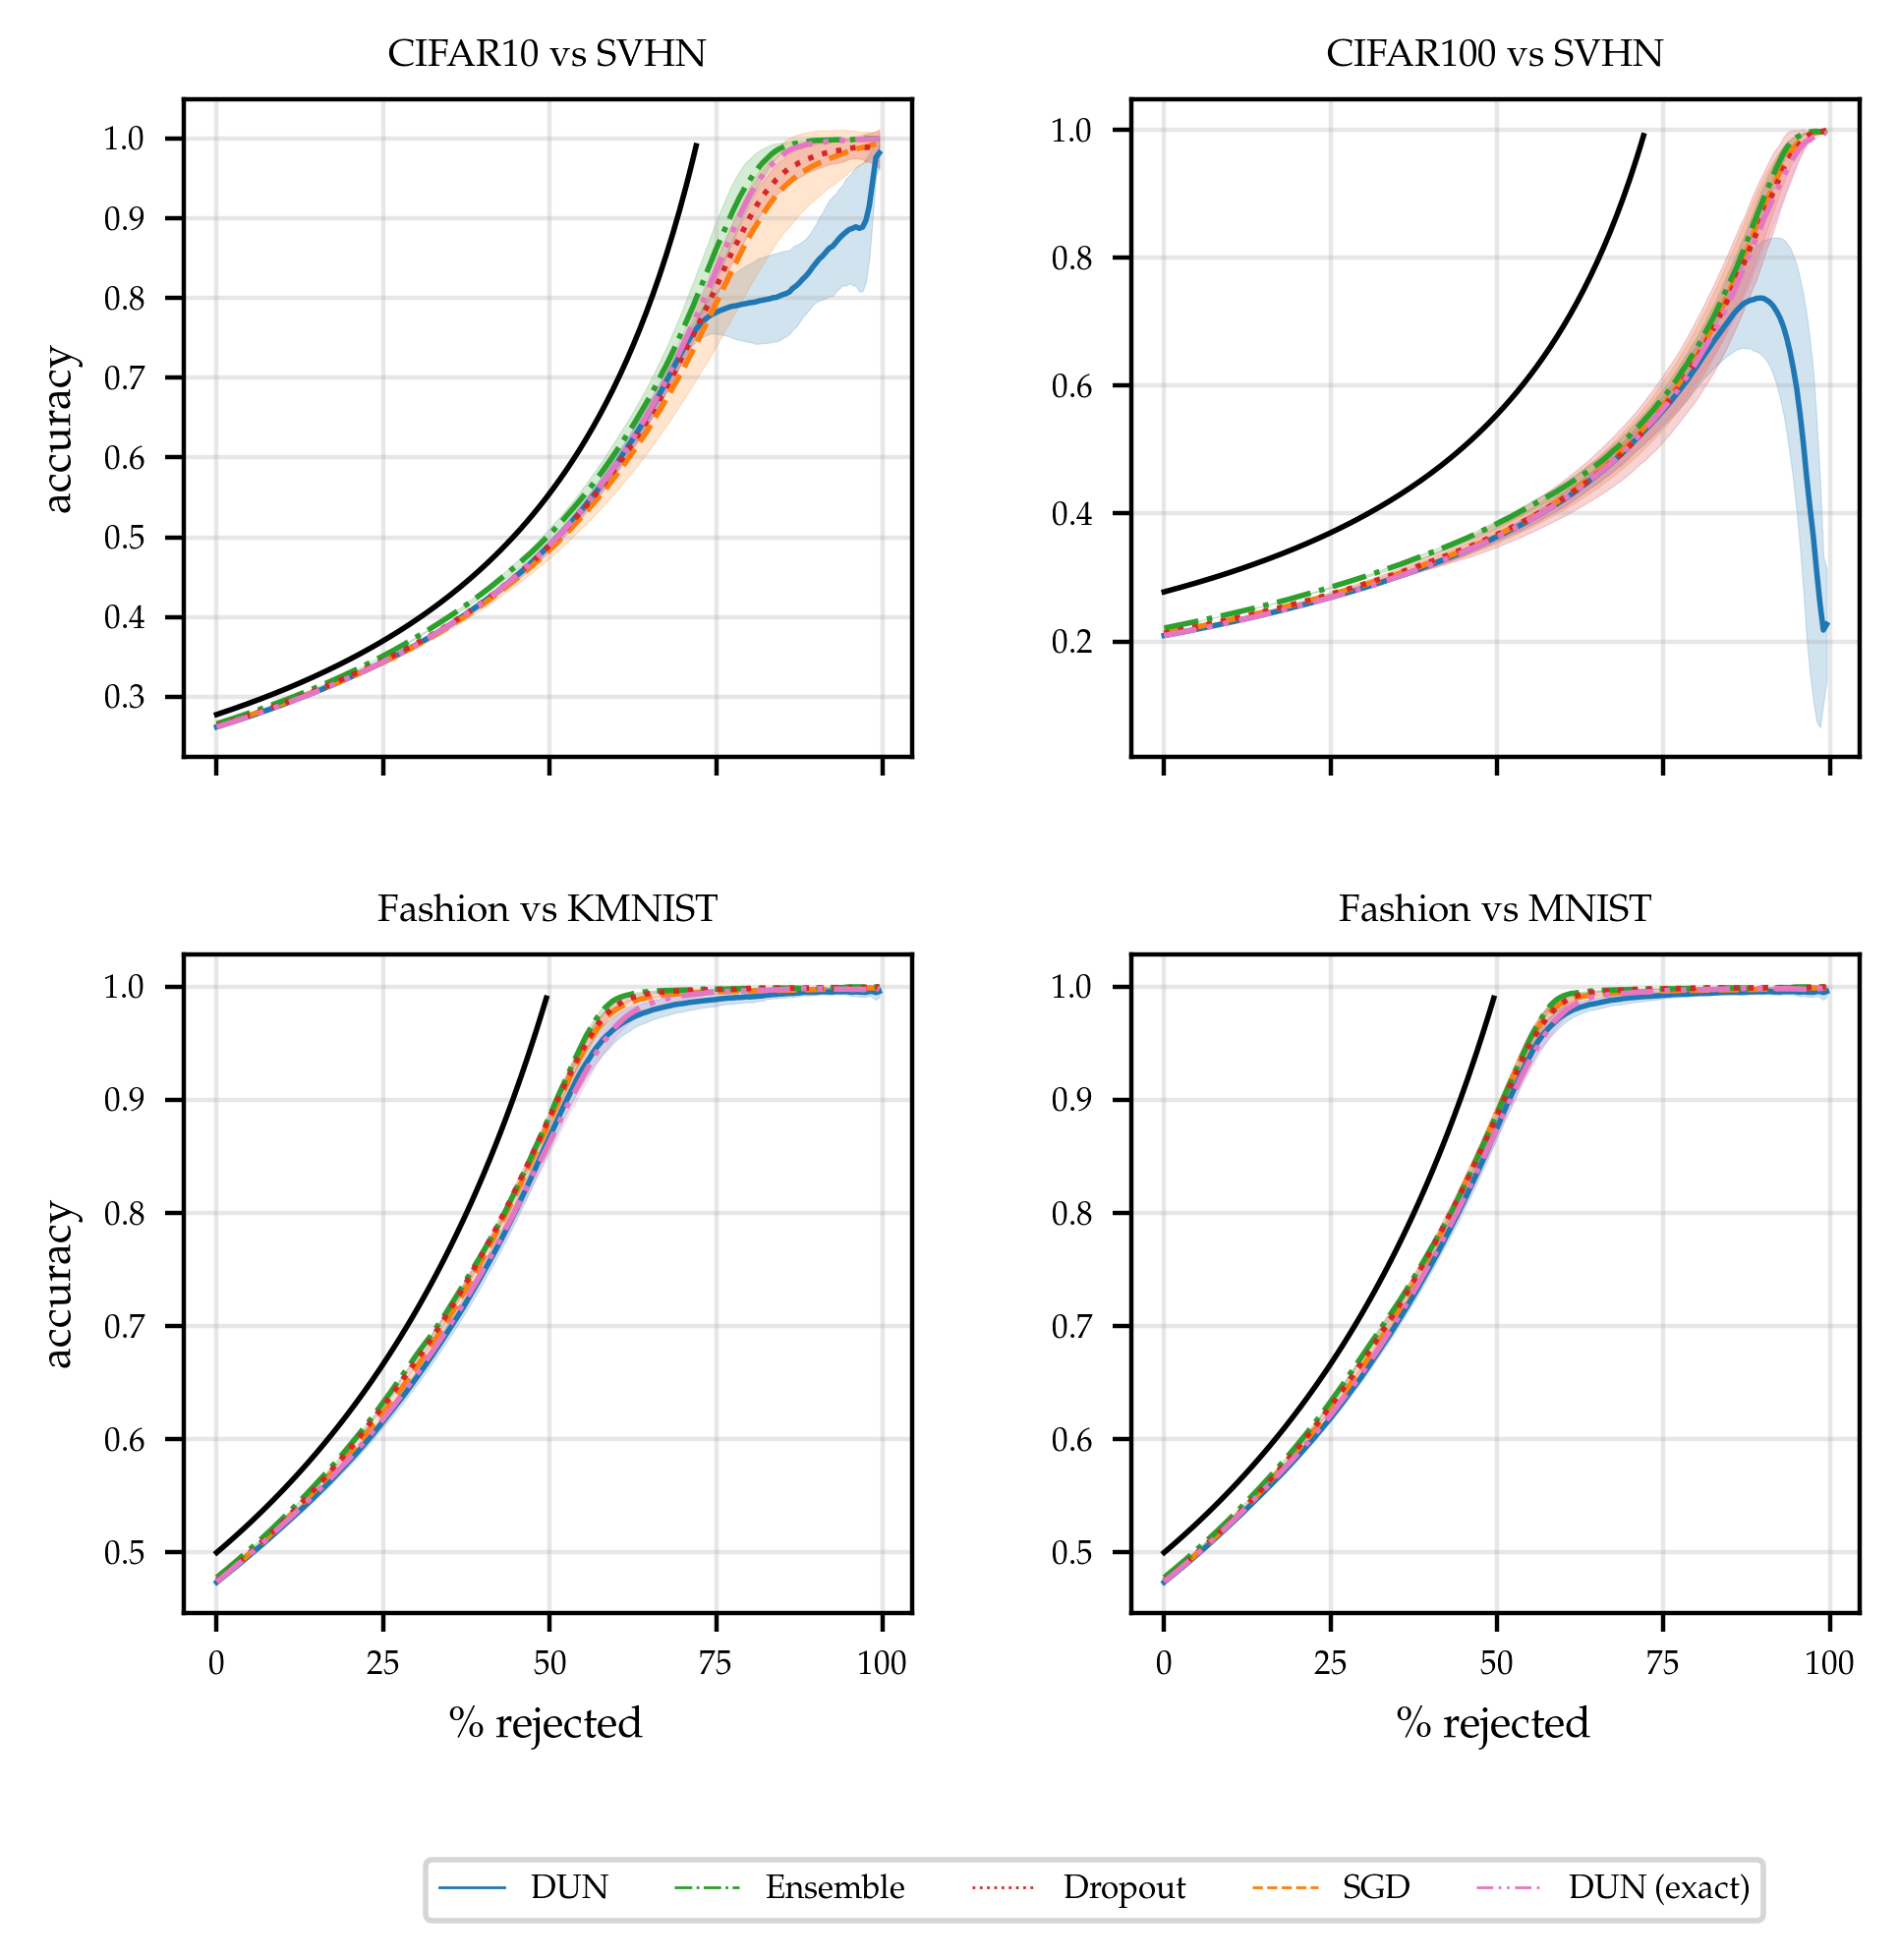

In [47]:
dpi = 400
scale = 1
fill = 0.66
fig, ax = plt.subplots(nrows=2, ncols=2, dpi=dpi, constrained_layout=False, sharex="all",
                       figsize=(scale*text_width, scale*text_width*golden_ratio*1.5))


plot_err_props(img_df, {"dataset": "CIFAR10", "target_dataset": "SVHN", "best_or_last": "last",
                        "wd": 1., "model": "res50"},
               add_cond_rej, ax[0, 0], formatting)

plot_err_props(img_df, {"dataset": "CIFAR100", "target_dataset": "SVHN", "best_or_last": "last",
                        "wd": 1., "model": "res50"},
               add_cond_rej, ax[0, 1], formatting)

plot_err_props(img_df, {"dataset": "Fashion", "target_dataset": "MNIST", "best_or_last": "last",
                        "wd": 1., "model": "res50"},
               add_cond_rej, ax[1, 1], formatting)

plot_err_props(img_df, {"dataset": "Fashion", "target_dataset": "KMNIST", "best_or_last": "last",
                        "wd": 1., "model": "res50"},
               add_cond_rej, ax[1, 0], formatting)

legend_items = []
for key, val in formatting.items():
    legend_items.append(mlines.Line2D([], [], color=val["color"],
                                      linestyle=val["linestyle"],
                                      label=val["label"], lw=0.5, ms=2))
ax[1, 1].legend(handles=legend_items[:5], ncol=5, loc='upper center', 
         bbox_to_anchor=(-0.05, -0.35))

[axi.grid(alpha=0.3, axis='both') for sublist in ax for axi in sublist]

ax[0, 0].set_title("CIFAR10 vs SVHN", fontsize=fs-1)
ax[0, 1].set_title("CIFAR100 vs SVHN", fontsize=fs-1)
ax[1, 1].set_title("Fashion vs MNIST", fontsize=fs-1)
ax[1, 0].set_title("Fashion vs KMNIST", fontsize=fs-1)


ax[0, 0].set_ylabel("accuracy")
ax[1, 0].set_ylabel("accuracy")

ax[1, 0].set_xlabel("$\%$ rejected")
ax[1, 1].set_xlabel("$\%$ rejected")

ax[1, 0].set_xticks([0., .25, .50, .75,  1.0])
ax[1, 0].set_xticklabels(["0", "25", "50", "75", "100"])

fig.subplots_adjust(wspace=0.3, hspace=0.3)

# plt.savefig('rejection_appendix.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

### AUC_ROC

In [ ]:
def create_aucroc_img_results_table(df, model='res50', best_or_last='best', p_drop=0.1, n_samples=20,
                                      n_elements=5, wd=True, start=1., stop=13.):
    
    # filter to match choices
    df_drop01 = filter_img_results(df, model=model, best_or_last=best_or_last, p_drop=p_drop, n_samples=n_samples,
                           n_elements=n_elements, wd=wd, start=start, stop=stop)
    
    df_drop03 = filter_img_results(df, model=model, best_or_last=best_or_last, p_drop=0.3, n_samples=n_samples,
                           n_elements=n_elements, wd=wd, start=start, stop=stop)
    

    df_drop03 = df_drop03[(df_drop03.method == "dropout")]
    df_drop03.method[(df_drop03.method == "dropout")] = "dropout (0.3)"
    

    df = pd.concat([df_drop01, df_drop03])
    
    df = df.rename(columns={"dataset": "Source", "target_dataset": "Target", "method": "Method"})
    
    df = df[~((df.Method == "DUN") & ((df.warmup == 0.) | (df.warmup == 1.)) & ((df.Source == "MNIST") | (df.Source == "Fashion")))]
    df = df[~((df.Method == "DUN") & ((df.warmup == 3.) | (df.warmup == 1.)) & ~((df.Source == "MNIST") | (df.Source == "Fashion")))]
    
    df.Method[df.use_no_train_post == True] = "DUN (exact)"
    
    df = (df
          .groupby(["Source", "Target", "Method"])
          .agg({"auc_roc": ["mean", "std"]})
    )

    df.columns = ['_'.join(t).rstrip('_') for t in df.columns.values]

    df["AUC"] = "$" + df.auc_roc_mean.apply("{0:.2f}".format) + " \scriptstyle \pm " + df.auc_roc_std.apply("{0:.2f}".format) + "$"
    df = df.drop(columns=["auc_roc_mean", "auc_roc_std"])
    
    df = df.unstack(-1, fill_value="").rename(columns={"ensemble": "Ensemble", "dropout": "Dropout"})
    
    df.index.names = ["\\textsc{Source}","\\textsc{Target}"]
    df = df.rename(columns={"Ensemble": "\\textsc{Ensemble}",
                            "Dropout": "\\textsc{Dropout}", "dropout (0.3)": "\\textsc{Dropout (0.3)}",
                            "DUN": "\\textsc{DUN}", "DUN (exact)": "\\textsc{DUN (exact)}",
                            "SGD": "\\textsc{SGD}"})
    df.columns.name="\\textsc{Method}" 
    
    return df, df.to_latex(multirow=True, escape=False, multicolumn_format='c')

aucroc_img_df, aucroc_latex = create_aucroc_img_results_table(img_df)
print(aucroc_latex) 
aucroc_img_df

### Compute Time

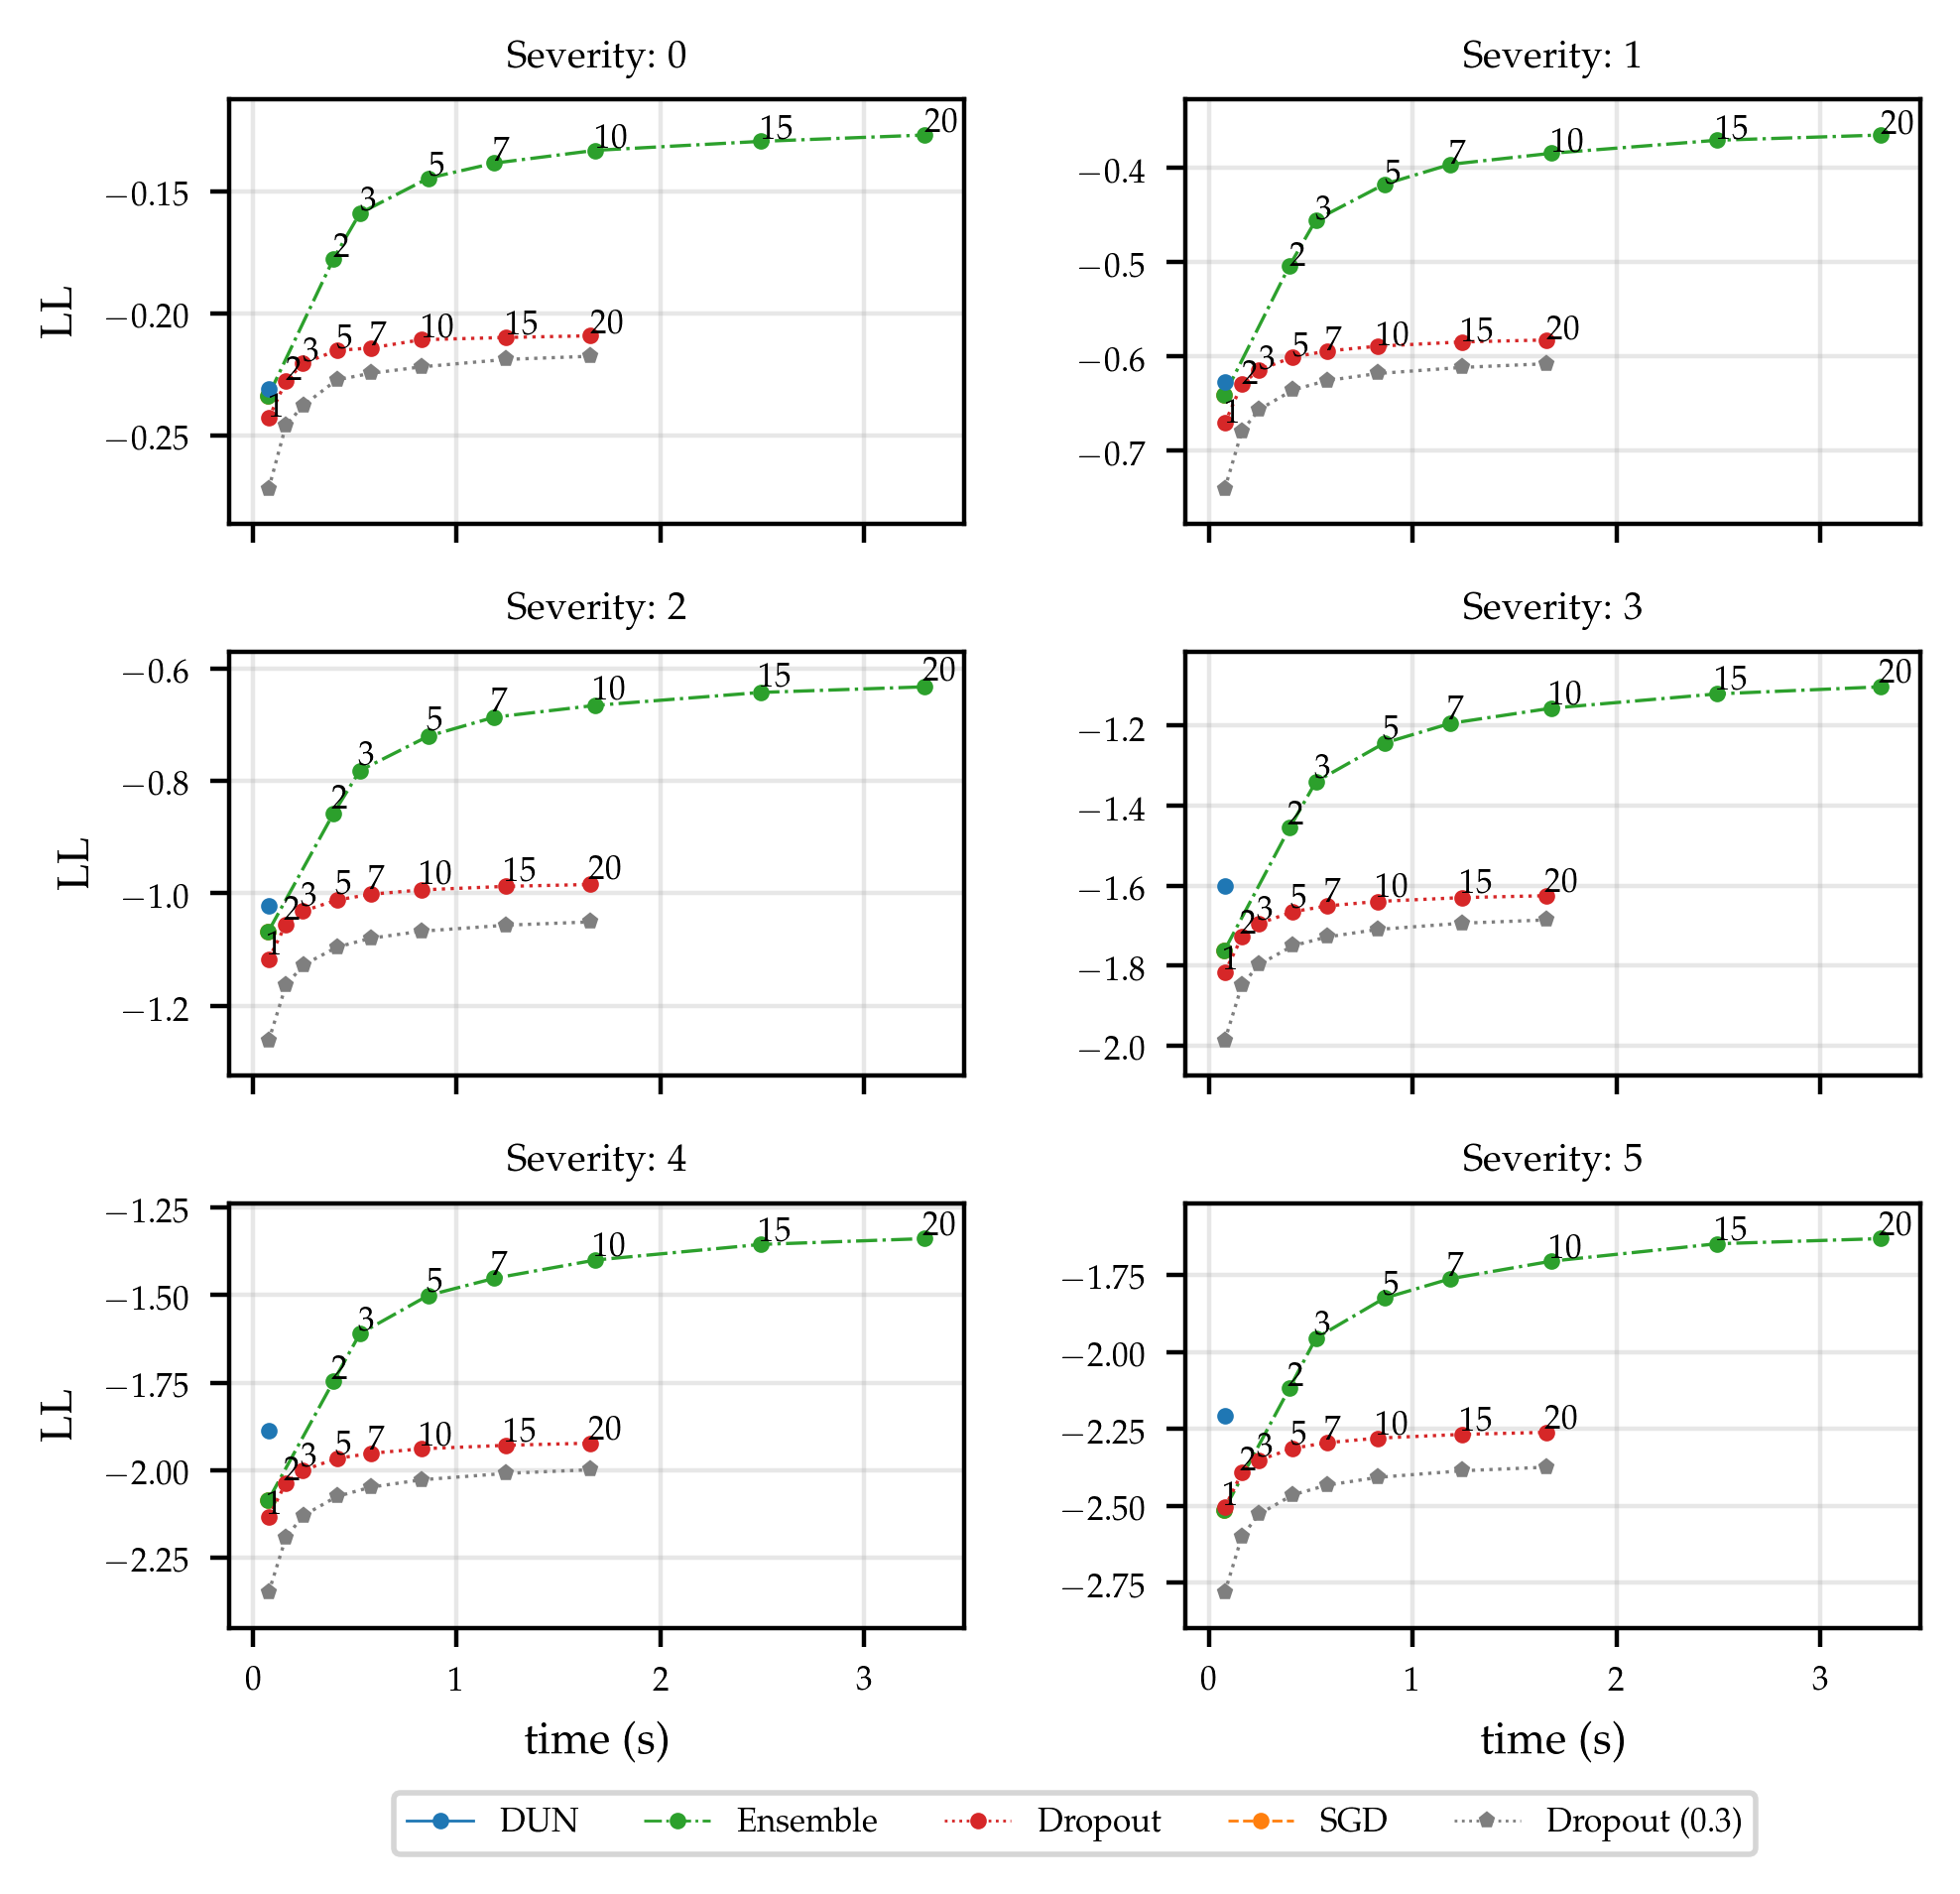

In [39]:
dpi = 400
scale = 1
fill = 0.66
fig, ax = plt.subplots(nrows=3, ncols=2, dpi=dpi, constrained_layout=False, sharex="all",
                       figsize=(scale*text_width, scale*text_width*golden_ratio*1.5))

add_cond_paretto_app = add_cond_paretto.copy()
add_cond_paretto_app["dropout (0.3)"] = {'p_drop': 0.3}


plot_paretto(img_df, "ll", 0., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto_app, ax[0, 0], formatting, label_offset=0.001)

plot_paretto(img_df, "ll", 1., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto_app, ax[0, 1], formatting, label_offset=0.001)

plot_paretto(img_df, "ll", 2., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto_app, ax[1, 0], formatting, label_offset=0.01)

plot_paretto(img_df, "ll", 3., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto_app, ax[1, 1], formatting, label_offset=0.01)

plot_paretto(img_df, "ll", 4., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto_app, ax[2, 0], formatting, label_offset=0.01)

plot_paretto(img_df, "ll", 5., {"best_or_last": "last", "wd": 1., "model": "res50"},
               add_cond_paretto_app, ax[2, 1], formatting, label_offset=0.01)

legend_items = []
for key, val in formatting.items():
    if key == "DUN (exact)": continue
    legend_items.append(mlines.Line2D([], [], color=val["color"],
                                      marker=val["marker"],
                                      linestyle=val["linestyle"],
                                      label=val["label"], lw=0.5, ms=2))
ax[2, 1].legend(handles=legend_items[:5], ncol=5, loc='upper center', 
         bbox_to_anchor=(-0.15, -0.35))

[axi.grid(alpha=0.3, axis='both') for sublist in ax for axi in sublist]

ax[0, 0].set_title("Severity: 0", fontsize=fs-1)
ax[0, 0].set_ylabel("LL")
ax[0, 0].margins(x=0.06, y=0.1) 
ax[0, 1].set_title("Severity: 1", fontsize=fs-1)
ax[0, 1].margins(x=0.06, y=0.1) 
ax[1, 0].set_title("Severity: 2", fontsize=fs-1)
ax[1, 0].set_ylabel("LL")
ax[1, 0].margins(x=0.06, y=0.1) 
ax[1, 1].set_title("Severity: 3", fontsize=fs-1)
ax[1, 1].margins(x=0.06, y=0.1) 
ax[2, 0].set_title("Severity: 4", fontsize=fs-1)
ax[2, 0].set_ylabel("LL")
ax[2, 0].margins(x=0.06, y=0.1) 
ax[2, 0].set_xlabel("time (s)")
ax[2, 1].set_title("Severity: 5", fontsize=fs-1)
ax[2, 1].set_xlabel("time (s)")
ax[2, 1].margins(x=0.06, y=0.1) 


fig.subplots_adjust(wspace=0.3, hspace=0.3)

# plt.savefig('img_timing_appendix.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()

### Bonus plot: MOM priors

In [41]:
from src.probability import pMOM_loglike, piMOM_loglike, peMOM_loglike

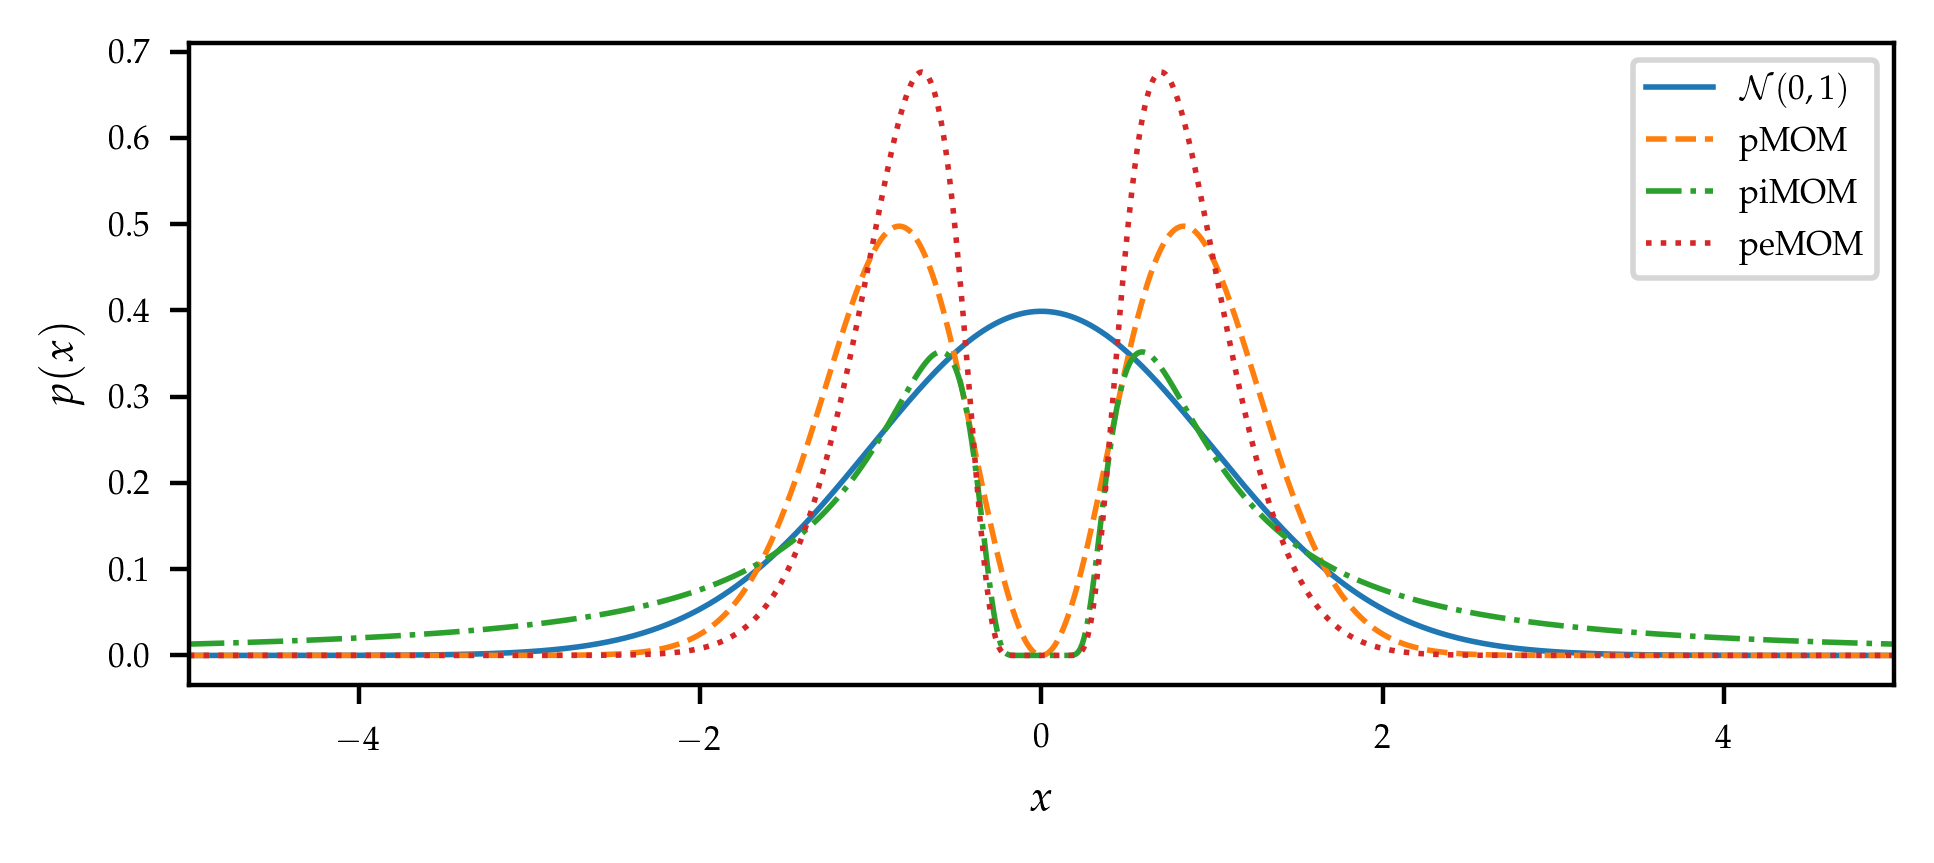

In [42]:
scale=1
dpi = 400

plt.figure(dpi=dpi, figsize=(scale*text_width, scale*text_width*golden_ratio/1.6))
xs = np.arange(-5, 5, 0.01)

norm = torch.distributions.normal.Normal(loc=0., scale=1.)
probs = [torch.exp(norm.log_prob(torch.tensor([x]))) for x in xs]
plt.plot(xs, probs, label="$\mathcal{N}(0,1)$", color=c[0], linestyle="-", lw=1)

pMOM = pMOM_loglike()
probs = [torch.exp(pMOM(torch.tensor([x]))) for x in xs]
plt.plot(xs, probs, label="pMOM", color=c[1], linestyle="--", lw=1)

piMOM = piMOM_loglike()
probs = [torch.exp(piMOM(torch.tensor([x]))) for x in xs]
plt.plot(xs, probs, label="piMOM", color=c[2], linestyle="-.", lw=1)

peMOM = peMOM_loglike()
probs = [torch.exp(peMOM(torch.tensor([x]))) for x in xs]
plt.plot(xs, probs, label="peMOM", color=c[3], linestyle=":", lw=1)

plt.xlim([-5, 5])
plt.legend()

plt.xlabel('$x$')
plt.ylabel('$p(x)$')

# plt.savefig('moms.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()